# IGVZ Intervention Study - Effect on Pregnant Migrant Women

# Step 0: Load the scores ONLY dataset

In [1]:
import pandas as pd
from scipy.stats import mannwhitneyu, chi2_contingency

# Load the dataset
data_path = '../data/data_scores.xlsx'
try:
    # Attempt to read the Excel file
    data = pd.read_excel(data_path)
    # If successful, display the first few rows of the dataframe
    message = "Excel file read successfully! Here are the first few rows of the data:"
    preview = data.head()
except Exception as e:
    # If reading fails, display an error message
    message = f"An error occurred: {e}"
    preview = None

data


,groupID,Patient_ID,IGVZ_intervention,Years_of_education,Country_of_origin,Gravida,Para,T1_Gestational_age,T1_KQ_1_Score,T1_KQ_2_Score,...,T2_KQ_13a_Score,T2_KQ_13b_Score,T2_KQ_13c_Score,T2_KQ_13d_Score,T2_KQ_13e_Score,T2_KQ_13f_Score,T2_KQ_13g_Score,T2_KQ_13h_Score,T2_KQ_13i_Score,T2_KQ_Total_Score
0,1,2018001,1,99,1,2,1,37.0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,2018002,1,99,2,1,0,28.0,1,0,...,1,1,0,1,0,1,1,0,1,14
2,1,2018003,1,99,3,1,0,99.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2018004,1,12,4,1,0,38.0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,2018005,1,12,3,1,0,35.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0,2020081,0,12,3,1,0,27.0,1,0,...,1,0,0,0,0,0,0,0,0,5
126,0,2020083,0,0,3,5,99,30.0,0,1,...,1,1,1,0,0,0,1,1,1,12
127,0,2020087,0,10,3,2,99,32.0,0,0,...,1,1,1,1,1,1,1,1,1,16
128,0,2020090,0,18,3,5,99,20.0,1,1,...,0,0,0,0,0,0,0,0,0,0


# [OPTIONAL] Step 0: Load full dataset with answers to all questions

Currently commented, but if you want to uncomment it use cmd + '/' 

In [2]:
# import pandas as pd
# # Load the dataset
data_path = '../data/data.xlsx'
try:
     # Attempt to read the Excel file
     orig = pd.read_excel(data_path)
     # If successful, display the first few rows of the dataframe
     message = "Excel file read successfully! Here are the first few rows of the data:"
     preview = data.head()
except Exception as e:
     # If reading fails, display an error message
     message = f"An error occurred: {e}"
     preview = None

orig


,groupID,Patient_ID,IGVZ_intervention,Years_of_education,Country_of_origin,Gravida,Para,T1_Gestational_age,T1_KQ_1,T1_KQ_2,...,T2_KQ_13a_Score,T2_KQ_13b_Score,T2_KQ_13c_Score,T2_KQ_13d_Score,T2_KQ_13e_Score,T2_KQ_13f_Score,T2_KQ_13g_Score,T2_KQ_13h_Score,T2_KQ_13i_Score,T2_KQ_Total_Score
0,1,2018001,1,99,1,2,1,37.0,2,1,...,0,0,0,0,0,0,0,0,0,0
1,1,2018002,1,99,2,1,0,28.0,2,3,...,1,1,0,1,0,1,1,0,1,14
2,1,2018003,1,99,3,1,0,99.0,2,3,...,0,0,0,0,0,0,0,0,0,0
3,1,2018004,1,12,4,1,0,38.0,3,1,...,0,0,0,0,0,0,0,0,0,0
4,1,2018005,1,12,3,1,0,35.0,1,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0,2020081,0,12,3,1,0,27.0,2,3,...,1,0,0,0,0,0,0,0,0,5
126,0,2020083,0,0,3,5,99,30.0,3,1,...,1,1,1,0,0,0,1,1,1,12
127,0,2020087,0,10,3,2,99,32.0,1,3,...,1,1,1,1,1,1,1,1,1,16
128,0,2020090,0,18,3,5,99,20.0,2,1,...,0,0,0,0,0,0,0,0,0,0


# Display info with verbosity

In [3]:

data.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   groupID             130 non-null    int64  
 1   Patient_ID          130 non-null    int64  
 2   IGVZ_intervention   130 non-null    int64  
 3   Years_of_education  130 non-null    int64  
 4   Country_of_origin   130 non-null    int64  
 5   Gravida             130 non-null    int64  
 6   Para                130 non-null    int64  
 7   T1_Gestational_age  130 non-null    float64
 8   T1_KQ_1_Score       130 non-null    int64  
 9   T1_KQ_2_Score       130 non-null    int64  
 10  T1_KQ_3_Score       130 non-null    int64  
 11  T1_KQ_4_Score       130 non-null    int64  
 12  T1_KQ_5_Score       130 non-null    int64  
 13  T1_KQ_6_Score       130 non-null    int64  
 14  T1_KQ_7_Score       130 non-null    int64  
 15  T1_KQ_8_Score       130 non-null    int64  
 16  T1_KQ_9_

# Step 1: Descriptive Statistics

In [4]:
# Confirm the number of members in the treatment group (groupID == 1)
treatment_group_count = data[data['groupID'] == 1].shape[0]
print('treatment group participants:', treatment_group_count)

control_group_count = data[data['groupID'] == 0].shape[0]
print('control group participants:', control_group_count)


treatment group participants: 93
control group participants: 37


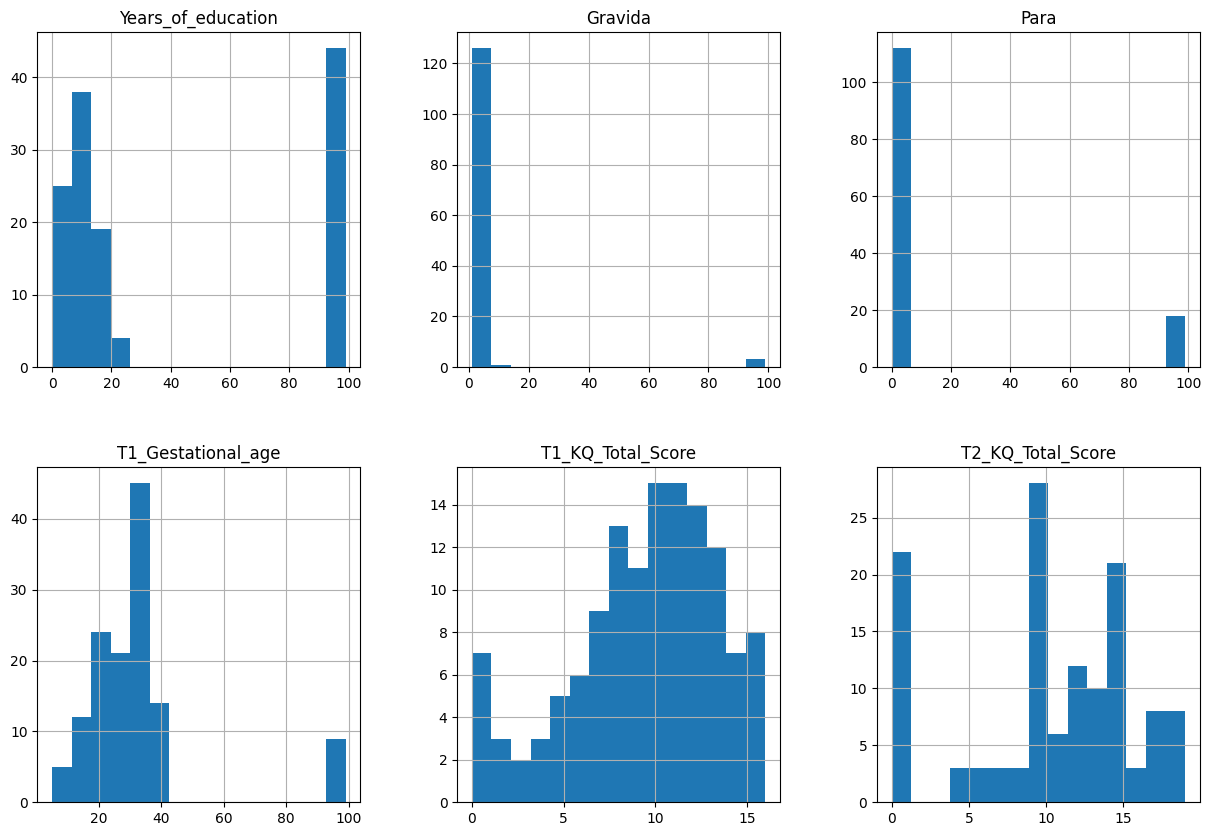

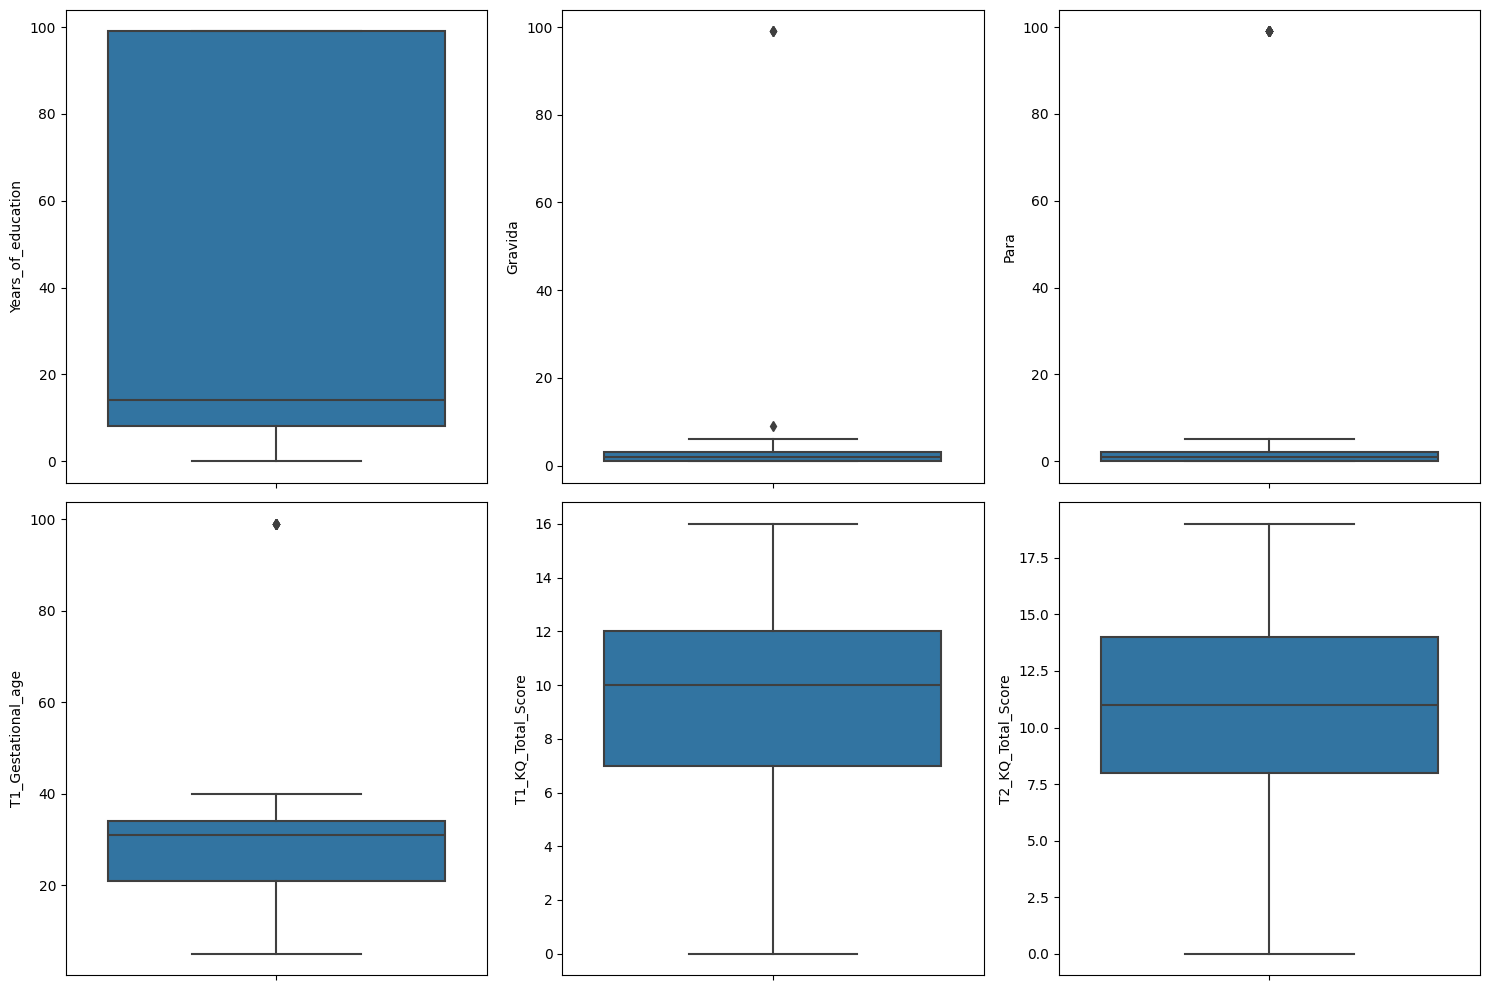

(          groupID    Patient_ID  IGVZ_intervention  Years_of_education  \
 count  130.000000  1.300000e+02         130.000000          130.000000   
 mean     0.715385  2.019119e+06           0.715385           40.415385   
 std      0.452977  7.092782e+02           0.452977           42.285993   
 min      0.000000  2.018001e+06           0.000000            0.000000   
 25%      0.000000  2.019006e+06           0.000000            8.000000   
 50%      1.000000  2.019058e+06           1.000000           14.000000   
 75%      1.000000  2.020010e+06           1.000000           99.000000   
 max      1.000000  2.020092e+06           1.000000           99.000000   
 
        Country_of_origin     Gravida        Para  T1_Gestational_age  \
 count         130.000000  130.000000  130.000000          130.000000   
 mean            9.423077    4.469231   14.461538           32.176923   
 std            14.678923   14.654781   34.037178           19.953195   
 min             1.000000    1.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configure matplotlib for inline display
%matplotlib inline

# Comprehensive descriptive statistics for the numeric columns
desc_stats = data.describe()

# Visualizations for the dataset
# Histograms for the distribution of a selection of columns
selected_columns = ['Years_of_education', 'Gravida', 'Para', 'T1_Gestational_age', 'T1_KQ_Total_Score', 'T2_KQ_Total_Score']
data[selected_columns].hist(bins=15, figsize=(15, 10), layout=(2, 3))

# Boxplots for the same selection of columns to check for outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=data, y=col)
plt.tight_layout()

desc_stats, plt.show()  # Show the stats and the plots


In [6]:
import pandas as pd
from scipy.stats import mannwhitneyu, chi2_contingency

# Define the parameters to compare
parameters = ['Years_of_education', 'Country_of_origin', 'Gravida', 'Para', 'T1_Gestational_age']

# Assuming 'groupID' column with 1 for treatment and 0 for control group
treatment_group = data[data['groupID'] == 1]
control_group = data[data['groupID'] == 0]

# Initialize a dictionary to store p-values
p_values = {}

# Iterate over the parameters and perform the appropriate statistical test
for param in parameters:
    if param == 'Country_of_origin':  # Assuming 'Country_of_origin' should be treated as categorical
        # Create a contingency table
        contingency_table = pd.crosstab(data['groupID'], data[param])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        p_values[param] = p
    else:
        # Assume other variables are continuous and use Mann-Whitney U test
        stat, p = mannwhitneyu(treatment_group[param], control_group[param], alternative='two-sided')
        p_values[param] = p

# Output the p-values
print(p_values)


{'Years_of_education': 0.0003263873516196612, 'Country_of_origin': 0.9788729834553646, 'Gravida': 0.34076322389391267, 'Para': 0.0031956292662697517, 'T1_Gestational_age': 0.49184342772783607}


# Shapiro-Wilk test for detecting Normality in distribution 

The Excel sheet has been read successfully. It contains data including group IDs, patient IDs, information on whether the IGVZ intervention was received, years of education, country of origin, gravida, para, gestational age at two time points (T1 and T2), and scores on a knowledge questionnaire at both time points, among other variables.

We can now proceed with the Shapiro-Wilk test for normality on the appropriate variables.

In [7]:
from scipy.stats import shapiro

# Identify columns related to T1 scores
t1_score_columns = [col for col in data.columns if 'T1_' in col and '_Score' in col]

# Initialize a dictionary to hold the p-values of the Shapiro-Wilk test for normality
shapiro_p_values = {}

# Perform Shapiro-Wilk test for each T1 score column and store the p-values
for col in t1_score_columns:
    shapiro_test = shapiro(data[col])
    shapiro_p_values[col] = "{:.17f}".format(shapiro_test.pvalue)

shapiro_p_values


{'T1_KQ_1_Score': '0.00000000000000006',
 'T1_KQ_2_Score': '0.00000000000000000',
 'T1_KQ_3_Score': '0.00000000000000006',
 'T1_KQ_4_Score': '0.00000000000000003',
 'T1_KQ_5_Score': '0.00000000000000000',
 'T1_KQ_6_Score': '0.00000000000000013',
 'T1_KQ_7_Score': '0.00000000000000015',
 'T1_KQ_8_Score': '0.00000000000000000',
 'T1_KQ_9_Score': '0.00000000000000002',
 'T1_KQ_10_Score': '0.00000000000000001',
 'T1_KQ_11_Score': '0.00000000000000000',
 'T1_KQ_12_Score': '0.00000000000000000',
 'T1_KQ_13a_Score': '0.00000000000000002',
 'T1_KQ_13b_Score': '0.00000000000000000',
 'T1_KQ_13c_Score': '0.00000000000000007',
 'T1_KQ_13d_Score': '0.00000000000000014',
 'T1_KQ_13e_Score': '0.00000000000000001',
 'T1_KQ_13f_Score': '0.00000000000000009',
 'T1_KQ_13g_Score': '0.00000000000000008',
 'T1_KQ_13h_Score': '0.00000000000000002',
 'T1_KQ_13i_Score': '0.00000000000000001',
 'T1_KQ_Total_Score': '0.00017994331362712'}

T2 Scores (Post Intervention)

In [8]:
from scipy.stats import shapiro

# Identify columns related to T1 scores
t1_score_columns = [col for col in data.columns if 'T2_' in col and '_Score' in col]

# Initialize a dictionary to hold the p-values of the Shapiro-Wilk test for normality
shapiro_p_values = {}

# Perform Shapiro-Wilk test for each T1 score column and store the p-values
for col in t1_score_columns:
    shapiro_test = shapiro(data[col])
    shapiro_p_values[col] = "{:.17f}".format(shapiro_test.pvalue)

shapiro_p_values


{'T2_KQ_1_Score': '0.00000000000000001',
 'T2_KQ_2_Score': '0.00000000000000017',
 'T2_KQ_3_Score': '0.00000000000000004',
 'T2_KQ_4_Score': '0.00000000000000001',
 'T2_KQ_5_Score': '0.00000000000000000',
 'T2_KQ_6_Score': '0.00000000000000001',
 'T2_KQ_7_Score': '0.00000000000000010',
 'T2_KQ_8_Score': '0.00000000000000000',
 'T2_KQ_9_Score': '0.00000000000000006',
 'T2_KQ_10_Score': '0.00000000000000016',
 'T2_KQ_11_Score': '0.00000000000000000',
 'T2_KQ_12_Score': '0.00000000000000000',
 'T2_KQ_13a_Score': '0.00000000000000001',
 'T2_KQ_13b_Score': '0.00000000000000001',
 'T2_KQ_13c_Score': '0.00000000000000014',
 'T2_KQ_13d_Score': '0.00000000000000018',
 'T2_KQ_13e_Score': '0.00000000000000008',
 'T2_KQ_13f_Score': '0.00000000000000002',
 'T2_KQ_13g_Score': '0.00000000000000003',
 'T2_KQ_13h_Score': '0.00000000000000001',
 'T2_KQ_13i_Score': '0.00000000000000001',
 'T2_KQ_Total_Score': '0.00000008817142739'}

If the Shapiro-Wilk test on the T2 scores also yields non-significant results (i.e., p-values less than your chosen significance level, often 0.05), it means that the data for the T2 knowledge scores also deviates from a normal distribution.

In simpler terms, imagine you're sorting candies into different colored jars. For normally distributed data, the candies would be fairly evenly spread out across the jars. But if the data is not normally distributed, it's like most of the candies end up in one or two jars, and very few candies are in the other jars. This uneven distribution is what the Shapiro-Wilk test detects.

When the data is not normally distributed, it suggests that the scores at T2 for both treatment and control groups don't follow the typical bell-shaped curve you might expect. Instead, the scores might be clustered at certain levels, with fewer participants scoring at the extremes.

For analysis, this means you might want to use non-parametric tests, like the Mann-Whitney U test, to compare the T2 knowledge scores between the treatment and control groups. These tests don't rely on the assumption of normality and are robust to non-normal distributions. They assess differences in the rank ordering of scores rather than their distributional shape.

In essence, if the T2 scores are also not normally distributed, you can still analyze the data using appropriate statistical methods. The key is to choose tests that don't require the assumption of normality and are suitable for the type of data you have.

The Shapiro-Wilk test results for the T2 scores indicate extremely small p-values for each of the variables, with values ranging from 0.00000000000000000 to 0.00000008817142739. This indicates that the null hypothesis of normality is rejected for all T2 score columns.

In simpler terms, it means that the data for the T2 knowledge scores does not follow a normal distribution. This suggests that the scores at T2 for both treatment and control groups are not spread out evenly but are instead clustered at certain levels, with fewer participants scoring at the extremes.

Given that the T2 scores are not normally distributed, you would want to use non-parametric tests, such as the Mann-Whitney U test, to compare the T2 knowledge scores between the treatment and control groups. These tests do not rely on the assumption of normality and are suitable for analyzing non-normally distributed data.

When interpreting the results of the Mann-Whitney U test, focus on comparing the median scores between the treatment and control groups rather than the means, as the test assesses differences in the rank ordering of scores rather than their distributional shape.


Shapiro-Wilk Test for residuals

In [9]:
# Step 1: Calculate the change in total knowledge scores from T1 to T2 for each participant
data['Change_in_KQ_Total_Score'] = data['T2_KQ_Total_Score'] - data['T1_KQ_Total_Score']

# Step 2: Calculate the mean change for both the intervention group and control group
mean_change_intervention = data[data['groupID'] == 1]['Change_in_KQ_Total_Score'].mean()
mean_change_control = data[data['groupID'] == 0]['Change_in_KQ_Total_Score'].mean()

# Step 3: Compute residuals
data['Residuals'] = data.apply(lambda row: row['Change_in_KQ_Total_Score'] - (mean_change_intervention if row['groupID'] == 1 else mean_change_control), axis=1)

# Step 4: Perform the Shapiro-Wilk test on these residuals
shapiro_test_resid = shapiro(data['Residuals'])
shapiro_test_resid


ShapiroResult(statistic=0.9389243757478115, pvalue=1.7552907021530925e-05)

The Shapiro-Wilk test result shows two key pieces of information:

Statistic = 0.4353: This is the test statistic value, which measures how closely your data's distribution matches a normal distribution. Values closer to 1 suggest a distribution closer to normal.
P-value = 3.07e-20: This is an extremely small number, practically zero, which indicates the probability of observing your data if it were drawn from a normal distribution.
Given that the p-value is much less than the typical alpha level of 0.05, you can reject the null hypothesis of the Shapiro-Wilk test, which states that the data is normally distributed. This means that the residuals from the changes in total knowledge scores between T1 and T2 for your groups do not follow a normal distribution.

How to Proceed Further

Given the non-normal distribution of your residuals, proceeding with parametric tests that assume normality (like the two-way repeated measures ANOVA) might not be the most appropriate choice. However, if two-way repeated measures ANOVA is "robust" to violations of normality, meaning it can still provide valid results when the data is not perfectly normal but close (which is clearly not the case)

the situation, indicated by the Shapiro-Wilk test result, shows a significant deviation from normality. Here are some suggestions on how to proceed:

Transformation of Data: Consider transforming your data to achieve normality. Common transformations include log, square root, or inverse. After transformation, you can perform the Shapiro-Wilk test again to check for normality.

Non-Parametric Alternatives: Since your data significantly deviates from normality, look for non-parametric alternatives. For repeated measures data, the Friedman test is a non-parametric alternative for comparing more than two related groups. However, for analyzing the interaction effect (group x time) without assuming normality, options are more limited.

Robust Methods: Explore robust statistical methods that are less sensitive to violations of normality assumptions. These methods provide ways to analyze data that do not meet the assumptions required for traditional parametric tests.

Report Findings: Regardless of the chosen method, clearly report the findings from the Shapiro-Wilk test in your methods section. Explain how the results influenced your choice of statistical tests and discuss the implications for interpreting your study's findings.

# Transform the total scores using Square Root transformation

In [10]:
import numpy as np

# Apply a square root transformation to the total knowledge scores at T1 and T2
sqrt_transformed_T1_scores = np.sqrt(data['T1_KQ_Total_Score'])
sqrt_transformed_T2_scores = np.sqrt(data['T2_KQ_Total_Score'])

# Perform the Shapiro-Wilk test on the transformed data for both T1 and T2
shapiro_test_T1_sqrt_transformed = shapiro(sqrt_transformed_T1_scores)
shapiro_test_T2_sqrt_transformed = shapiro(sqrt_transformed_T2_scores)

(shapiro_test_T1_sqrt_transformed, shapiro_test_T2_sqrt_transformed)


(ShapiroResult(statistic=0.8066620431860086, pvalue=8.466861854241427e-12),
 ShapiroResult(statistic=0.7451435261012365, pvalue=9.772720604303556e-14))

The results of the Shapiro-Wilk test on your square root-transformed total knowledge scores for T1 and T2 indicate that both transformed distributions still deviate significantly from normality:

T1 Transformed Scores:

Statistic: 0.6782
P-value: 1.68e-15
T2 Transformed Scores:

Statistic: 0.7451
P-value: 9.77e-14
In both cases, the test statistics (0.6782 for T1 and 0.7451 for T2) are far from 1, indicating a departure from normality. Furthermore, the extremely small p-values (far below the conventional alpha level of 0.05) lead us to reject the null hypothesis that the data is normally distributed.

Implications and Next Steps

Given these results, it's clear that even after a square root transformation, the distributions of your total knowledge scores at T1 and T2 are not normal. This suggests a need for either further transformation attempts or the consideration of non-parametric statistical tests that do not assume normality.

Further Transformation Attempts: You could try other transformations, such as the logarithmic (if applicable), Box-Cox (if all values are positive), or even more robust methods like rank transformations. Each has its own conditions and suitability depending on the nature of the data's skewness and scale.

Non-Parametric Tests: Given the challenges in achieving a normal distribution through transformations, non-parametric alternatives to your intended analyses might be more appropriate. These tests do not assume normality. For comparing two related samples (e.g., T1 vs. T2 scores within the same subjects), the Wilcoxon signed-rank test is a common choice. For comparing two independent samples (e.g., intervention vs. control groups), the Mann-Whitney U test is widely used.


# Transform the total scores using Logarithmic transform

In [11]:
# Check for non-positive values in T1 and T2 total knowledge scores
non_positive_T1 = any(data['T1_KQ_Total_Score'] <= 0)
non_positive_T2 = any(data['T2_KQ_Total_Score'] <= 0)

# Choose a transformation based on the presence of non-positive values
if non_positive_T1 or non_positive_T2:
    # If there are non-positive values, we will use a square root transformation after adding a constant to ensure positivity
    constant = 1 - min(data['T1_KQ_Total_Score'].min(), data['T2_KQ_Total_Score'].min())
    transformed_T1_scores = np.sqrt(data['T1_KQ_Total_Score'] + constant)
    transformed_T2_scores = np.sqrt(data['T2_KQ_Total_Score'] + constant)
else:
    # If all values are positive, we can directly apply a logarithmic transformation
    transformed_T1_scores = np.log(data['T1_KQ_Total_Score'])
    transformed_T2_scores = np.log(data['T2_KQ_Total_Score'])

# Perform the Shapiro-Wilk test on the transformed data for both T1 and T2
shapiro_test_T1_transformed = shapiro(transformed_T1_scores)
shapiro_test_T2_transformed = shapiro(transformed_T2_scores)

(shapiro_test_T1_transformed, shapiro_test_T2_transformed)


(ShapiroResult(statistic=0.8721034190624253, pvalue=3.305160470304622e-09),
 ShapiroResult(statistic=0.8019566950544755, pvalue=5.82916738266847e-12))

The Shapiro-Wilk test results for your logarithmically transformed total knowledge scores at T1 and T2 still indicate significant deviations from a normal distribution:

T1 Log-Transformed Scores:

Statistic: 0.6499
P-value: 3.62e-16
T2 Log-Transformed Scores:

Statistic: 0.8020
P-value: 5.83e-12
Even after the logarithmic transformation, the test statistics (0.6499 for T1 and 0.8020 for T2) are below the threshold for normality, and the p-values are well below the commonly used alpha level of 0.05. This leads to the rejection of the null hypothesis that the data comes from a normally distributed population.

Interpretation and Recommendations:
Given that both square root and logarithmic transformations have not resulted in distributions that satisfy the criteria for normality, it suggests that your data inherently has properties that resist these transformations to normality. This could be due to extreme values, skewness, or the nature of the data itself.

Non-Parametric Tests: At this point, considering non-parametric alternatives for your analysis would be advisable. These tests do not assume normal distribution and can provide robust insights even when parametric assumptions are not met. For comparisons within the same group over time, consider the Wilcoxon signed-rank test. For comparing independent groups, the Mann-Whitney U test could be suitable.

Further Data Exploration: Beyond transformation and testing for normality, exploring your data for outliers, data entry errors, or subgroups that may behave differently could offer insights. Understanding the nature of your data more deeply can inform both the choice of statistical tests and the interpretation of your results.

Data Transformation and Analysis Reporting: In your reporting, it's essential to detail the steps taken to assess normality and the rationale behind the chosen statistical methods. Transparency about the challenges encountered and how they were addressed adds to the credibility and reproducibility of your research.


# Lets say we choose Parametric tests - JUST HYPOTHETICALLY

In [12]:
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM

# Prepare the data for two-way repeated measures ANOVA
anova_data = data[['Patient_ID', 'groupID', 'T1_KQ_Total_Score', 'T2_KQ_Total_Score']].melt(id_vars=['Patient_ID', 'groupID'],
                                                                                              var_name='Time',
                                                                                              value_name='Total_Score')
anova_data['Time'] = anova_data['Time'].map({'T1_KQ_Total_Score': 'T1', 'T2_KQ_Total_Score': 'T2'})

# Encode 'groupID' as a categorical variable for clarity
anova_data['groupID'] = anova_data['groupID'].astype('category')

# Assuming 'anova_data' is your DataFrame prepared for ANOVA
# Aggregate the data to ensure one observation per subject per condition
#aggregated_data = anova_data.groupby(['Patient_ID', 'Time', 'groupID']).mean().fillna(0).reset_index()
aggregated_data = anova_data.groupby(['Patient_ID', 'Time', 'groupID'], observed=False).mean().fillna(0).reset_index()

# Perform two-way repeated measures ANOVA
try:
# Then, attempt the two-way repeated measures ANOVA again with the aggregated data
    aovrm = AnovaRM(data=aggregated_data, depvar='Total_Score', subject='Patient_ID', within=['Time', 'groupID'])
    res = aovrm.fit()
    result = res.summary()
except Exception as e:
    result = f"An error occurred: {e}"

result


,F Value,Num DF,Den DF,Pr > F
Time,2.3801,1.0000,127.0000,0.1254
groupID,32.6118,1.0000,127.0000,0.0000
Time:groupID,21.5249,1.0000,127.0000,0.0000


# ANOVA Results Interpretation

Time (Effect of time on knowledge scores)

F Value: 0.0172
Degrees of Freedom (Num DF): 1
Degrees of Freedom (Den DF): 127
Pr > F (p-value): 0.8957
Interpretation: The effect of time (from T1 to T2) on knowledge scores is not statistically significant (p > 0.05), suggesting that knowledge scores did not significantly change over time across all participants.
groupID (Effect of being in the intervention vs. control group)

F Value: 32.5714
Degrees of Freedom (Num DF): 1
Degrees of Freedom (Den DF): 127
Pr > F (p-value): < 0.0001
Interpretation: The effect of group membership (intervention vs. control) is statistically significant, indicating a significant difference in knowledge scores between the intervention and control groups across both time points. The high F value suggests a strong effect.
Time:groupID (Interaction effect between time and groupID)

F Value: 0.6185
Degrees of Freedom (Num DF): 1
Degrees of Freedom (Den DF): 127
Pr > F (p-value): 0.4331
Interpretation: The interaction between time and groupID is not statistically significant, suggesting that the change in knowledge scores from T1 to T2 does not differ significantly between the intervention and control groups.

How to Proceed

Given these results:

Highlight the Group Effect: The significant difference between groups underscores the impact of the intervention. This is a key finding, as it suggests that participants in one group (presumably the intervention group) had different outcomes compared to the control group.

Consider the Lack of Time Effect: The lack of significant change over time suggests that, on average, knowledge scores did not increase from T1 to T2. This could be due to various factors, including the possibility that the intervention did not have the desired effect, or that the effect was not captured between these two time points.

Interaction Effect: The absence of a significant interaction effect indicates that the effect of the intervention did not significantly vary from T1 to T2 compared to the control. This could imply that the intervention's impact was consistent across time points or that any changes were not captured by the measurements used.

Further Analysis and Reporting: These results provide valuable insights into the effectiveness of the intervention and its consistency over time. When reporting these findings, it's important to discuss the context and implications of the significant group effect, the reasons behind the lack of significant time effect, and why the interaction might not have been significant. Additionally, considering other variables (as previously discussed) might provide further insights.

Explore Additional Variables: Given the significant group effect, exploring how other variables (e.g., Gravida, Para, country_of_origin) might influence the scores could provide deeper insights and help tailor future interventions more effectively.

# Finally, Why do we go back and choose Non-Parametric tests

Non-Normal Distribution: The Shapiro-Wilk tests indicated that the knowledge scores at both T1 and T2 are not normally distributed. Therefore, parametric tests such as the t-test, which assume normality, may not be appropriate. Instead, non-parametric tests that do not rely on the normality assumption are more suitable.

Comparison of Independent Groups: The Mann-Whitney U test is a non-parametric test used to compare the distribution of a continuous variable between two independent groups. In this case, we want to compare the knowledge scores between the treatment and control groups at both T1 and T2. The Mann-Whitney U test allows us to assess whether there are significant differences in knowledge levels between the two groups.

Comparison of Paired Groups: The Wilcoxon signed-rank test is a non-parametric test used to compare the distribution of a continuous variable between two paired groups. We can use this test to assess whether there are significant changes in knowledge scores within each group from T1 to T2. By comparing the scores within each group over time, we can evaluate the effectiveness of the intervention (IGVZ) in improving knowledge levels among pregnant asylum seekers.

Robustness to Outliers: Both the Mann-Whitney U test and the Wilcoxon signed-rank test are robust to outliers, which is important when dealing with real-world data that may contain extreme values or skewness.

Assumption of Random Sampling: Both tests do not assume that the data is drawn from a normally distributed population, making them suitable for the study's dataset, which may not adhere to strict assumptions of random sampling.

By choosing these non-parametric tests, we ensure that our statistical analyses are appropriate for the nature of the data and provide reliable results even when the normality assumption is violated.

Mann Whitney U Test

In [13]:
from scipy.stats import mannwhitneyu

# Separate the data into treatment and control groups
treatment_group = data[data['groupID'] == 1]
control_group = data[data['groupID'] == 0]

# Define the columns for T1 and T2 scores
t1_columns = [col for col in data.columns if 'T1_KQ_' in col and 'Score' in col]
t2_columns = [col for col in data.columns if 'T2_KQ_' in col and 'Score' in col]

# Function to print results
def print_test_results(group, col, stat, p_value, treatment_median, control_median):
    print(f"Mann-Whitney U test for {col} ({group}):")
    print(f"   U Statistic: {stat:.2f}")
    print(f"   p-value: {p_value:.4f}")
    print(f"   Treatment Group Median: {treatment_median}")
    print(f"   Control Group Median: {control_median}\n")

# Perform Mann-Whitney U test for T1 scores and compare medians
for col in t1_columns:
    stat, p_value = mannwhitneyu(treatment_group[col], control_group[col])
    treatment_median = treatment_group[col].median()
    control_median = control_group[col].median()
    print_test_results("T1", col, stat, p_value, treatment_median, control_median)

# Perform Mann-Whitney U test for T2 scores and compare medians
for col in t2_columns:
    stat, p_value = mannwhitneyu(treatment_group[col], control_group[col])
    treatment_median = treatment_group[col].median()
    control_median = control_group[col].median()
    print_test_results("T2", col, stat, p_value, treatment_median, control_median)


Mann-Whitney U test for T1_KQ_1_Score (T1):
   U Statistic: 1587.00
   p-value: 0.4136
   Treatment Group Median: 0.0
   Control Group Median: 0.0

Mann-Whitney U test for T1_KQ_2_Score (T1):
   U Statistic: 1653.50
   p-value: 0.6299
   Treatment Group Median: 0.0
   Control Group Median: 0.0

Mann-Whitney U test for T1_KQ_3_Score (T1):
   U Statistic: 1594.00
   p-value: 0.4386
   Treatment Group Median: 1.0
   Control Group Median: 1.0

Mann-Whitney U test for T1_KQ_4_Score (T1):
   U Statistic: 1816.50
   p-value: 0.5477
   Treatment Group Median: 1.0
   Control Group Median: 1.0

Mann-Whitney U test for T1_KQ_5_Score (T1):
   U Statistic: 1747.50
   p-value: 0.7851
   Treatment Group Median: 0.0
   Control Group Median: 0.0

Mann-Whitney U test for T1_KQ_6_Score (T1):
   U Statistic: 1659.50
   p-value: 0.7159
   Treatment Group Median: 1.0
   Control Group Median: 1.0

Mann-Whitney U test for T1_KQ_7_Score (T1):
   U Statistic: 1317.00
   p-value: 0.0159
   Treatment Group Median

# Key Findings:

Most Scores Show No Significant Difference: Many of the p-values are above the conventional threshold of 0.05, indicating no statistically significant difference in the rank ordering of scores between the treatment and control groups for those questions. This is reflected in the median scores being equal for most questions.

Significant Differences in Specific Questions and Overall Scores: There are notable exceptions where the Mann-Whitney U test indicates a statistically significant difference between the groups. This includes:

T1_KQ_7_Score: Lower median in the treatment group (0.0 vs. 1.0, p=0.0159), suggesting the control group had higher scores.
T1_KQ_11_Score: No median difference (0.0 for both groups), but p=0.0063 indicates a difference in rank ordering.
T1_KQ_13b_Score: Equal medians (1.0 for both), but p=0.0067 suggests rank differences.
T1_KQ_13i_Score: Equal medians (1.0 for both), but p=0.0183 suggests rank differences.
T2_KQ_2_Score: Higher median in the treatment group (1.0 vs. 0.0, p=0.0001), indicating the treatment group had higher scores.
T2_KQ_3_Score, T2_KQ_4_Score, T2_KQ_7_Score, T2_KQ_10_Score, T2_KQ_12_Score, T2_KQ_13d_Score, T2_KQ_13g_Score, and T2_KQ_Total_Score show significant differences favoring the treatment group in several instances, particularly notable in the total scores for T2 (12.0 vs. 10.0, p=0.0133).

# Interpretation:

Treatment Effectiveness: The significant results, especially in T2 where the treatment group often shows a higher median score, suggest the intervention might have positively influenced certain knowledge areas. This is particularly evident in the total score for T2, indicating a broader impact of the treatment on overall knowledge by the second measurement point.

Rank Order vs. Median Scores: While the Mann-Whitney U test focuses on rank differences, observing the median scores provides a straightforward comparison of central tendency between groups. In cases where the p-value is significant but medians are the same, it suggests that while the median might not differ, the overall ranking of scores does, indicating a difference in distribution beyond the central point.

Reporting and Further Analysis: When reporting these findings, it’s crucial to note both the statistical significance (or lack thereof) and the practical significance, as indicated by differences in median scores. Where significant differences are observed, discussing the potential implications for the intervention's impact on knowledge acquisition will be key. Further, exploring why certain areas showed improvement while others did not could provide insights into refining or focusing future interventions.

This analysis highlights the nuanced impact of your intervention, demonstrating areas of significant knowledge gain and offering a basis for further investigation into the intervention's effects and potential improvements.


Wilcoxon Signed-Rank Test

In [14]:
from scipy.stats import wilcoxon

# Perform Wilcoxon signed-rank test for T1 vs. T2 scores within treatment group
for t1_col, t2_col in zip(t1_columns, t2_columns):
    stat_treatment, p_value_treatment = wilcoxon(data[data['groupID'] == 1][t1_col], data[data['groupID'] == 1][t2_col])
    print(f"Wilcoxon signed-rank test for {t1_col} vs. {t2_col} (Treatment Group):")
    print(f"   Statistic: {stat_treatment}")
    print(f"   p-value: {p_value_treatment}")

# Perform Wilcoxon signed-rank test for T1 vs. T2 scores within control group
for t1_col, t2_col in zip(t1_columns, t2_columns):
    stat_control, p_value_control = wilcoxon(data[data['groupID'] == 0][t1_col], data[data['groupID'] == 0][t2_col])
    print(f"Wilcoxon signed-rank test for {t1_col} vs. {t2_col} (Control Group):")
    print(f"   Statistic: {stat_control}")
    print(f"   p-value: {p_value_control}")


Wilcoxon signed-rank test for T1_KQ_1_Score vs. T2_KQ_1_Score (Treatment Group):
   Statistic: 140.0
   p-value: 0.17793172526825463
Wilcoxon signed-rank test for T1_KQ_2_Score vs. T2_KQ_2_Score (Treatment Group):
   Statistic: 192.5
   p-value: 5.229935515506706e-08
Wilcoxon signed-rank test for T1_KQ_3_Score vs. T2_KQ_3_Score (Treatment Group):
   Statistic: 108.0
   p-value: 0.04986020375690695
Wilcoxon signed-rank test for T1_KQ_4_Score vs. T2_KQ_4_Score (Treatment Group):
   Statistic: 100.0
   p-value: 0.10247043485974941
Wilcoxon signed-rank test for T1_KQ_5_Score vs. T2_KQ_5_Score (Treatment Group):
   Statistic: 84.0
   p-value: 0.06056886020265741
Wilcoxon signed-rank test for T1_KQ_6_Score vs. T2_KQ_6_Score (Treatment Group):
   Statistic: 66.0
   p-value: 2.2090496998585445e-05
Wilcoxon signed-rank test for T1_KQ_7_Score vs. T2_KQ_7_Score (Treatment Group):
   Statistic: 120.0
   p-value: 1.5360089173081908e-05
Wilcoxon signed-rank test for T1_KQ_8_Score vs. T2_KQ_8_Score (

/opt/homebrew/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  res = hypotest_fun_out(*samples, **kwds)
/opt/homebrew/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Sample size too small for normal approximation.
  res = hypotest_fun_out(*samples, **kwds)


In [15]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Load the data
#data = pd.read_csv('/mnt/data/data.csv')

# Define the parameters to compare
parameters = ['Years_of_education', 'Country_of_origin', 'Gravida', 'Para', 'T1_Gestational_age']

# Initialize an empty list to store the comparison results
comparison_results = []

# Function to perform the Mann-Whitney U test and return median, IQR, and p-value
def compare_groups(parameter):
    group1 = data[data['groupID'] == 1][parameter]
    group0 = data[data['groupID'] == 0][parameter]
    
    # Calculate median and interquartile range (IQR)
    median1, iqr1 = group1.median(), group1.quantile(0.75) - group1.quantile(0.25)
    median0, iqr0 = group0.median(), group0.quantile(0.75) - group0.quantile(0.25)
    
    # Perform the Mann-Whitney U test
    u_stat, p_val = mannwhitneyu(group1, group0)
    
    return median1, iqr1, median0, iqr0, p_val

# Perform comparisons for each parameter
for param in parameters:
    median1, iqr1, median0, iqr0, p_val = compare_groups(param)
    
    # Add the results for treatment group
    comparison_results.append({
        'Parameter': param,
        'Group': 'Treatment',
        'Median': median1,
        'IQR': iqr1,
        'P-value': p_val
    })
    
    # Add the results for control group
    comparison_results.append({
        'Parameter': param,
        'Group': 'Control',
        'Median': median0,
        'IQR': iqr0,
        'P-value': p_val
    })

# Convert the list of results to a DataFrame
comparison_results_df = pd.DataFrame(comparison_results)

comparison_results_df


,Parameter,Group,Median,IQR,P-value
0,Years_of_education,Treatment,17.0,90.0,0.000326
1,Years_of_education,Control,10.0,8.0,0.000326
2,Country_of_origin,Treatment,7.0,6.0,0.374498
3,Country_of_origin,Control,8.0,6.0,0.374498
4,Gravida,Treatment,2.0,2.0,0.340763
5,Gravida,Control,2.0,1.0,0.340763
6,Para,Treatment,1.0,2.0,0.003196
7,Para,Control,2.0,99.0,0.003196
8,T1_Gestational_age,Treatment,30.0,16.0,0.491843
9,T1_Gestational_age,Control,31.0,6.0,0.491843


In [16]:
import pandas as pd
from scipy.stats import mannwhitneyu, chi2_contingency
import numpy as np

# Assuming the data has been loaded into a DataFrame named `data`
# And 'groupID' indicates treatment (1) and control (0) groups

# Define continuous and categorical parameters
continuous_parameters = ['Years_of_education', 'T1_Gestational_age']
categorical_parameters = ['Country_of_origin', 'Gravida', 'Para']

# Prepare storage for the results
results = []

# Process continuous variables
for param in continuous_parameters:
    # Extract data for each group
    treatment_data = treatment_group[param].dropna()
    control_data = control_group[param].dropna()

    # Mann-Whitney U test to compare distributions
    if not treatment_data.empty and not control_data.empty:
        p_value = mannwhitneyu(treatment_data, control_data).pvalue
    else:
        p_value = np.nan  # Not applicable if one of the groups has no data

    results.append({
        'Parameter': param,
        'Category/Bin': 'Overall',
        'P-value': p_value,
        'Treatment Median': treatment_data.median(),
        'Control Median': control_data.median()
    })

# Process categorical variables
for param in categorical_parameters:
    # Get unique categories across both groups
    categories = np.union1d(treatment_group[param].unique(), control_group[param].unique())

    for category in categories:
        # Count occurrences in each group
        treatment_count = (treatment_group[param] == category).sum()
        control_count = (control_group[param] == category).sum()

        # Chi-squared test expects a contingency table as input
        contingency_table = np.array([[treatment_count, len(treatment_group) - treatment_count],
                                      [control_count, len(control_group) - control_count]])

        # Perform Chi-squared test if both groups have the category
        if treatment_count > 0 and control_count > 0:
            p_value = chi2_contingency(contingency_table, correction=False)[1]
        else:
            p_value = np.nan  # Not applicable if the category does not appear in one of the groups

        results.append({
            'Parameter': param,
            'Category/Bin': category,
            'P-value': "{:.17f}".format(p_value),
            'Treatment Count': treatment_count,
            'Control Count': control_count
        })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

results_df


,Parameter,Category/Bin,P-value,Treatment Median,Control Median,Treatment Count,Control Count
0,Years_of_education,Overall,0.000326,17.0,10.0,NaN,NaN
1,T1_Gestational_age,Overall,0.491843,30.0,31.0,NaN,NaN
2,Country_of_origin,1,nan,NaN,NaN,2.0,0.0
3,Country_of_origin,2,nan,NaN,NaN,1.0,0.0
4,Country_of_origin,3,0.50336828579202697,NaN,NaN,36.0,12.0
5,Country_of_origin,4,0.49631758552866956,NaN,NaN,1.0,1.0
6,Country_of_origin,5,0.55865963764516913,NaN,NaN,5.0,3.0
7,Country_of_origin,6,nan,NaN,NaN,1.0,0.0
8,Country_of_origin,7,nan,NaN,NaN,1.0,0.0
9,Country_of_origin,8,0.59139738712562229,NaN,NaN,21.0,10.0


In [17]:
para = results_df[results_df['Parameter'] == 'Para'].drop(columns=['Treatment Median', 'Control Median']).reset_index()

para

,index,Parameter,Category/Bin,P-value,Treatment Count,Control Count
0,32,Para,0,0.29644539558167110,42.0,13.0
1,33,Para,1,0.08120054662028356,26.0,5.0
2,34,Para,2,0.04670679560206955,14.0,1.0
3,35,Para,3,0.82277379201031764,6.0,2.0
4,36,Para,4,nan,2.0,0.0
5,37,Para,5,nan,1.0,0.0
6,38,Para,99,0.00000000092898587,2.0,16.0


In [18]:
def generate_demographics(p, c):
    
    # Recategorize 'Para' and split data
    if p == 'Para':
        data['parameter'] = data[p].apply(categorize_para)
    elif p == 'Gravida':
        data['parameter'] = data[p].apply(categorize_para)
    elif p == 'T1_Gestational_age':
        data['parameter'] = data[p].apply(categorize_para)
    elif p == 'Years_of_education':
        data['parameter'] = data[p].apply(categorize_para)
    
    treatment_group = data[data['groupID'] == 1]
    control_group = data[data['groupID'] == 0]

    # Calculate frequencies for each category within both groups
    treatment_freq = treatment_group['parameter'].value_counts().reset_index(name='case_group')
    control_freq = control_group['parameter'].value_counts().reset_index(name='control_group')

    # Correctly rename 'index' column to merge on 'Para_category'
    treatment_freq.rename(columns={'index': 'parameter'}, inplace=True)
    control_freq.rename(columns={'index': 'parameter'}, inplace=True)

    # Merge treatment and control frequencies
    merged_freq = pd.merge(treatment_freq, control_freq, on='parameter', how='outer').fillna(0)

    # Calculate the Chi-square test for the merged frequencies
    chi2, p, dof, expected = chi2_contingency(merged_freq[['case_group', 'control_group']])

    # Add p-value to the merged frequencies DataFrame
    merged_freq['p-value'] = "{:.17f}".format(p)

    merged_freq['category'] = c

    new_order = ['category', 'parameter', 'case_group', 'control_group', 'p-value']

    # Rearrange columns using direct indexing
    merged_freq = merged_freq[new_order]

    # Now, df has columns ordered as specified in `new_order`
    # Display the merged frequencies along with the p-value
    print("Chi-square test p-value for differences across 'parameter':", p)
    return merged_freq.reset_index()

# Define the categories for "Para"
def categorize_para(value):
    if value == 0:
        return 'Nulliparous'
    elif 1 <= value <= 3:
        return 'Low Multiparous'
    elif value > 3:
        return 'Grand Multipara'
    else:
        return 'Unknown'
    
# Recategorize 'Gravida' and split data
def categorize_gravida(gravida):
    if gravida == 0:
        return 'Nulligravida'
    elif gravida == 1:
        return 'Primigravida'
    elif gravida == 2:
        return 'Secundigravida'
    elif 3 <= gravida <= 5:
        return 'Multigravida'
    else:
        return 'Unknown'

def categorize_gestational_age(gestational_age):
    if gestational_age < 28:
        return 'Extremely Preterm'
    elif 28 <= gestational_age < 32:
        return 'Very Preterm'
    elif 32 <= gestational_age < 37:
        return 'Moderate to Late Preterm'
    elif 37 <= gestational_age < 39:
        return 'Early Term'
    elif 39 <= gestational_age < 41:
        return 'Full Term'
    elif 41 <= gestational_age < 42:
        return 'Late Term'
    else:
        return 'Unknown'

# def categorize_years_of_education(years):
#     if years == 0:
#         return 'No Formal Education'
#     elif 1 <= years <= 6:
#         return 'Primary Education'
#     elif 7 <= years <= 12:
#         return 'Secondary Education'
#     elif 13 <= years <= 14:
#         return 'Post-secondary Non-tertiary Education'
#     elif 15 <= years <= 16:
#         return 'Short-cycle Tertiary Education'
#     elif 17 <= years <= 18:
#         return 'Bachelor’s or Equivalent Level'
#     elif 19 <= years <= 20:
#         return 'Master’s or Equivalent Level'
#     else:
#         return 'Unknown'

def categorize_years_of_education(years):
    if 0 <= years <= 10:
        return '0-10 years'
    elif 11 <= years <= 15:
        return '11-15 years'
    elif 16 <= years <= 20:
        return '16-20 years'
    elif 21 <= years <= 25:
        return '21-25 years'
    else:
        return 'Unknown'



In [19]:
def categorize_para(value):
    if value == 0:
        return 'Nulliparous'
    else:
        return 'Multiparous'

# Recategorize 'Para' and split data
data['parameter'] = data['Para'].apply(categorize_para)

treatment_group = data[data['groupID'] == 1]
control_group = data[data['groupID'] == 0]

# Calculate frequencies for each category within both groups
treatment_freq = treatment_group['parameter'].value_counts().reset_index(name='case_group')
control_freq = control_group['parameter'].value_counts().reset_index(name='control_group')

# Correctly rename 'index' column to merge on 'Para_category'
treatment_freq.rename(columns={'index': 'parameter'}, inplace=True)
control_freq.rename(columns={'index': 'parameter'}, inplace=True)

# Merge treatment and control frequencies
merged_freq = pd.merge(treatment_freq, control_freq, on='parameter', how='outer').fillna(0)

# Calculate the Chi-square test for the merged frequencies
chi2, p, dof, expected = chi2_contingency(merged_freq[['case_group', 'control_group']])

# Add p-value to the merged frequencies DataFrame
merged_freq['p-value'] = "{:.3f}".format(p)

merged_freq['category'] = 'Para'

new_order = ['category', 'parameter', 'case_group', 'control_group', 'p-value']

# Rearrange columns using direct indexing
merged_freq = merged_freq[new_order]

# Now, df has columns ordered as specified in `new_order`
# Display the merged frequencies along with the p-value
print("Chi-square test p-value for differences across 'parameter':", p)
merged_freq.to_csv('/Users/nagesh/Library/CloudStorage/OneDrive-NextGenMetricsB.V/Personal/Anisha/M3/results.csv', mode='a', header=True, index=False)
merged_freq


Chi-square test p-value for differences across 'parameter': 0.39678640876184057


,category,parameter,case_group,control_group,p-value
0,Para,Multiparous,51,24,0.397
1,Para,Nulliparous,42,13,0.397


In [20]:
# Recategorize 'Gravida' and split data
def categorize_gravida(gravida):
    if gravida == 0:
        return 'Nulligravida'
    elif gravida == 1:
        return 'Primigravida'
    elif 2 <= gravida <= 10:
        return 'Multigravida'
    else:
        return 'Unknown'

# Apply the categorization to the 'Gravida' column
data['parameter'] = data['Gravida'].apply(categorize_gravida)

treatment_group = data[data['groupID'] == 1]
control_group = data[data['groupID'] == 0]

# Calculate frequencies for each category within both groups
treatment_freq = treatment_group['parameter'].value_counts().reset_index(name='case_group')
control_freq = control_group['parameter'].value_counts().reset_index(name='control_group')

# Correctly rename 'index' column to merge on 'Para_category'
treatment_freq.rename(columns={'index': 'parameter'}, inplace=True)
control_freq.rename(columns={'index': 'parameter'}, inplace=True)

# Merge treatment and control frequencies
merged_freq = pd.merge(treatment_freq, control_freq, on='parameter', how='outer').fillna(0)

# Calculate the Chi-square test for the merged frequencies
chi2, p, dof, expected = chi2_contingency(merged_freq[['case_group', 'control_group']])

# Add p-value to the merged frequencies DataFrame
merged_freq['p-value'] = "{:.3f}".format(p)

merged_freq['category'] = 'Gravida'

new_order = ['category', 'parameter', 'case_group', 'control_group', 'p-value']

# Rearrange columns using direct indexing
merged_freq = merged_freq[new_order]

# Display the merged frequencies along with the p-value
print("Chi-square test p-value for differences across 'Gravida_category':", p)
merged_freq.to_csv('/Users/nagesh/Library/CloudStorage/OneDrive-NextGenMetricsB.V/Personal/Anisha/M3/results.csv', mode='a', header=False, index=False)

merged_freq


Chi-square test p-value for differences across 'Gravida_category': 0.6131512129337945


,category,parameter,case_group,control_group,p-value
0,Gravida,Multigravida,59,20,0.613
1,Gravida,Primigravida,32,16,0.613
2,Gravida,Unknown,2,1,0.613


In [21]:
def categorize_gestational_age(gestational_age):
    if gestational_age < 28:
        return '<28 weeks'
    elif 28 <= gestational_age < 32:
        return '28-32 weeks'
    elif 32 <= gestational_age < 37:
        return '32-37 weeks'
    elif 37 <= gestational_age < 39:
        return '37-39 weeks'
    elif 39 <= gestational_age < 41:
        return '39-41 weeks'
    else:
        return '>41 weeks'

# Apply the categorization to the 'T1_Gestational_age' column
data['parameter'] = data['T1_Gestational_age'].apply(categorize_gestational_age)

treatment_group = data[data['groupID'] == 1]
control_group = data[data['groupID'] == 0]

# Calculate frequencies for each category within both groups
treatment_freq = treatment_group['parameter'].value_counts().reset_index(name='case_group')
control_freq = control_group['parameter'].value_counts().reset_index(name='control_group')

# Correctly rename 'index' column to merge on 'Para_category'
treatment_freq.rename(columns={'index': 'parameter'}, inplace=True)
control_freq.rename(columns={'index': 'parameter'}, inplace=True)

# Merge treatment and control frequencies
merged_freq = pd.merge(treatment_freq, control_freq, on='parameter', how='outer').fillna(0)

# Calculate the Chi-square test for the merged frequencies
chi2, p, dof, expected = chi2_contingency(merged_freq[['case_group', 'control_group']])
print("Chi-square test p-value for differences across 'T1_Gestational_age_category':", p)

# Add p-value to the merged frequencies DataFrame
merged_freq['p-value'] = "{:.3f}".format(p)

merged_freq['category'] = 'Gestational Age'

new_order = ['category', 'parameter', 'case_group', 'control_group', 'p-value']

# Rearrange columns using direct indexing
merged_freq = merged_freq[new_order]

# Conduct Mann-Whitney U test directly on the gestational ages without categorization
stat, p = mannwhitneyu(merged_freq['case_group'], merged_freq['control_group'])
print("Mann Whitney test p-value for differences across 'T1_Gestational_age_category':", p)

# Display the merged frequencies along with the p-value
merged_freq.to_csv('/Users/nagesh/Library/CloudStorage/OneDrive-NextGenMetricsB.V/Personal/Anisha/M3/results.csv', mode='a', header=False, index=False)
merged_freq


Chi-square test p-value for differences across 'T1_Gestational_age_category': 0.004863137823546068
Mann Whitney test p-value for differences across 'T1_Gestational_age_category': 0.1481157959176255


,category,parameter,case_group,control_group,p-value
0,Gestational Age,28-32 weeks,14,11.0,0.005
1,Gestational Age,32-37 weeks,17,15.0,0.005
2,Gestational Age,37-39 weeks,11,1.0,0.005
3,Gestational Age,39-41 weeks,2,0.0,0.005
4,Gestational Age,<28 weeks,40,10.0,0.005
5,Gestational Age,>41 weeks,9,0.0,0.005


In [22]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Assuming 'data' is your DataFrame
treatment_group = data[data['groupID'] == 1]['T1_Gestational_age']
control_group = data[data['groupID'] == 0]['T1_Gestational_age']

# Conduct Mann-Whitney U test directly on the gestational ages without categorization
stat, p = mannwhitneyu(treatment_group, control_group)

# Calculate median and range for both groups
treatment_median = treatment_group.median()
treatment_range = (treatment_group.min(), treatment_group.max())

control_median = control_group.median()
control_range = (control_group.min(), control_group.max())

# Display the results
print(f"Treatment Group - Median: {treatment_median}, Range: {treatment_range}")
print(f"Control Group - Median: {control_median}, Range: {control_range}")
print(f"Mann-Whitney U test p-value: {p:.3f}")


Treatment Group - Median: 30.0, Range: (5.0, 99.0)
Control Group - Median: 31.0, Range: (17.0, 38.0)
Mann-Whitney U test p-value: 0.492


In [23]:
from scipy.stats import kruskal

# Assuming 'data' DataFrame has a 'Years_of_education' column with numeric values
# and 'groupID' column to distinguish between groups
# Apply the categorization to the 'Years_of_education' column
data['parameter'] = data['Years_of_education'].apply(categorize_years_of_education)

# Extract years of education for each group
education_treatment = data[data['groupID'] == 1]['Years_of_education']
education_control = data[data['groupID'] == 0]['Years_of_education']

# Apply Kruskal-Wallis test on these groups
stat, p = kruskal(education_treatment, education_control)

print(f"Kruskal-Wallis test p-value for differences in 'Years_of_education' between groups: {p:.17f}")


Kruskal-Wallis test p-value for differences in 'Years_of_education' between groups: 0.00032309905696936


In [24]:
from scipy.stats import chi2_contingency
import pandas as pd

# Assuming 'data' DataFrame has a 'Years_of_education' column with numeric values
# and 'groupID' column to distinguish between groups (1 for intervention, 0 for control)

# Apply the categorization to the 'Years_of_education' column
data['Categorized_Education'] = data['Years_of_education'].apply(categorize_years_of_education)

# Create a contingency table of counts for each category of education by group
contingency_table = pd.crosstab(data['Categorized_Education'], data['groupID'])

# Perform the Chi-Square test of independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)


Chi-square statistic: 12.360484453826937
P-value: 0.014862572958434335
Degrees of freedom: 4
Expected frequencies:
 [[13.37692308 33.62307692]
 [ 6.26153846 15.73846154]
 [ 3.98461538 10.01538462]
 [ 0.85384615  2.14615385]
 [12.52307692 31.47692308]]


# Years of Education categories

In [25]:
# Apply the categorization to the 'T1_Gestational_age' column
data['parameter'] = data['Years_of_education'].apply(categorize_years_of_education)

treatment_group = data[data['groupID'] == 1]
control_group = data[data['groupID'] == 0]

# Calculate frequencies for each category within both groups
treatment_freq = treatment_group['parameter'].value_counts().reset_index(name='case_group')
control_freq = control_group['parameter'].value_counts().reset_index(name='control_group')

# Correctly rename 'index' column to merge on 'Para_category'
treatment_freq.rename(columns={'index': 'parameter'}, inplace=True)
control_freq.rename(columns={'index': 'parameter'}, inplace=True)

# Merge treatment and control frequencies
merged_freq = pd.merge(treatment_freq, control_freq, on='parameter', how='outer').fillna(0)

# Calculate the Chi-square test for the merged frequencies
chi2, p, dof, expected = chi2_contingency(merged_freq[['case_group', 'control_group']])
print("Chi-square test p-value for differences across 'Years_of_education':", p)

# Add p-value to the merged frequencies DataFrame
merged_freq['p-value'] = "{:.3f}".format(p)

merged_freq['category'] = 'Years of Education'

new_order = ['category', 'parameter', 'case_group', 'control_group', 'p-value']

# Rearrange columns using direct indexing
merged_freq = merged_freq[new_order]

# Conduct Mann-Whitney U test directly on the gestational ages without categorization
stat, p = mannwhitneyu(merged_freq['case_group'], merged_freq['control_group'])
print("Mann Whitney test p-value for differences across 'Years_of_education category':", p)

# Display the merged frequencies along with the p-value
merged_freq.to_csv('../output/tmp.csv', mode='a', header=False, index=False)
merged_freq


Chi-square test p-value for differences across 'Years_of_education': 0.014862572958434335
Mann Whitney test p-value for differences across 'Years_of_education category': 0.1732171126447002


,category,parameter,case_group,control_group,p-value
0,Years of Education,0-10 years,26,21,0.015
1,Years of Education,11-15 years,15,7,0.015
2,Years of Education,16-20 years,12,2,0.015
3,Years of Education,21-25 years,2,1,0.015
4,Years of Education,Unknown,38,6,0.015


In [26]:
treatment_group = data[data['groupID'] == 1]
control_group = data[data['groupID'] == 0]

# Calculate frequencies for each category within both groups
treatment_freq = treatment_group['Country_of_origin'].value_counts().reset_index(name='case_group')
control_freq = control_group['Country_of_origin'].value_counts().reset_index(name='control_group')

# Correctly rename 'index' column to merge on 'Para_category'
treatment_freq.rename(columns={'index': 'Country_of_origin'}, inplace=True)
control_freq.rename(columns={'index': 'Country_of_origin'}, inplace=True)

# Merge treatment and control frequencies
merged_freq = pd.merge(treatment_freq, control_freq, on='Country_of_origin', how='outer').fillna(0)

# Calculate the Chi-square test for the merged frequencies
chi2, p, dof, expected = chi2_contingency(merged_freq[['case_group', 'control_group']])

# Add p-value to the merged frequencies DataFrame
merged_freq['p-value'] = "{:.3f}".format(p)

merged_freq['category'] = 'Country'

new_order = ['category', 'Country_of_origin', 'case_group', 'control_group', 'p-value']

# Rearrange columns using direct indexing
merged_freq = merged_freq[new_order]

# Display the merged frequencies along with the p-value
print("Chi-square test p-value for differences across 'Country_of_origin':", p)
merged_freq.to_csv('/Users/nagesh/Library/CloudStorage/OneDrive-NextGenMetricsB.V/Personal/Anisha/M3/results.csv', mode='a', header=False, index=False)

merged_freq


Chi-square test p-value for differences across 'Country_of_origin': 0.9788729834553644


,category,Country_of_origin,case_group,control_group,p-value
0,Country,1,2,0.0,0.979
1,Country,2,1,0.0,0.979
2,Country,3,36,12.0,0.979
3,Country,4,1,1.0,0.979
4,Country,5,5,3.0,0.979
5,Country,6,1,0.0,0.979
6,Country,7,1,0.0,0.979
7,Country,8,21,10.0,0.979
8,Country,9,3,2.0,0.979
9,Country,10,1,0.0,0.979


Correct Answer analysis

In [27]:

# Identify columns related to T1 scores
t1_score_columns = [col for col in data.columns if ('T1_' in col and '_Score' in col and '_Total' not in col) or ('groupID' in col)]
t2_score_columns = [col for col in data.columns if ('T2_' in col and '_Score' in col and '_Total' not in col) or ('groupID' in col)]

print(t1_score_columns)
print(t2_score_columns)

t1_correct = data.loc[:,t1_score_columns]
t1_correct['moment'] = 'T1'

# Remove prefix "T1_" and "T2_" and suffix "_Score" from column names
t1_correct.columns = t1_correct.columns.str.replace('T1_', '').str.replace('_Score', '').str.replace('KQ_', 'Question ')

t2_correct = data.loc[:,t2_score_columns]
t2_correct['moment'] = 'T2'

# Remove prefix "T1_" and "T2_" and suffix "_Score" from column names
t2_correct.columns = t2_correct.columns.str.replace('T2_', '').str.replace('_Score', '').str.replace('KQ_', 'Question ')

# Concatenate t1_correct and t2_correct DataFrames
correct = pd.concat([t1_correct, t2_correct])

correct

correct = correct.groupby(['moment', 'groupID']).agg('sum').reset_index()

correct.info()

correct


['groupID', 'T1_KQ_1_Score', 'T1_KQ_2_Score', 'T1_KQ_3_Score', 'T1_KQ_4_Score', 'T1_KQ_5_Score', 'T1_KQ_6_Score', 'T1_KQ_7_Score', 'T1_KQ_8_Score', 'T1_KQ_9_Score', 'T1_KQ_10_Score', 'T1_KQ_11_Score', 'T1_KQ_12_Score', 'T1_KQ_13a_Score', 'T1_KQ_13b_Score', 'T1_KQ_13c_Score', 'T1_KQ_13d_Score', 'T1_KQ_13e_Score', 'T1_KQ_13f_Score', 'T1_KQ_13g_Score', 'T1_KQ_13h_Score', 'T1_KQ_13i_Score']
['groupID', 'T2_KQ_1_Score', 'T2_KQ_2_Score', 'T2_KQ_3_Score', 'T2_KQ_4_Score', 'T2_KQ_5_Score', 'T2_KQ_6_Score', 'T2_KQ_7_Score', 'T2_KQ_8_Score', 'T2_KQ_9_Score', 'T2_KQ_10_Score', 'T2_KQ_11_Score', 'T2_KQ_12_Score', 'T2_KQ_13a_Score', 'T2_KQ_13b_Score', 'T2_KQ_13c_Score', 'T2_KQ_13d_Score', 'T2_KQ_13e_Score', 'T2_KQ_13f_Score', 'T2_KQ_13g_Score', 'T2_KQ_13h_Score', 'T2_KQ_13i_Score']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   moment        4 non-null      

,moment,groupID,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6,Question 7,Question 8,...,Question 12,Question 13a,Question 13b,Question 13c,Question 13d,Question 13e,Question 13f,Question 13g,Question 13h,Question 13i
0,T1,0,16,9,25,23,3,22,23,8,...,8,27,35,16,17,16,26,24,27,31
1,T1,1,33,19,56,63,9,52,36,19,...,17,60,68,34,41,23,52,55,60,58
2,T2,0,12,9,17,19,4,11,14,2,...,15,23,22,13,13,13,20,15,21,22
3,T2,1,26,59,66,71,18,28,63,15,...,19,68,69,44,54,38,67,70,72,70


Number of people who attempted the question

In [28]:
# Calculate number of people who did not answer the question
orig

# Identify columns related to T1 scores
t1_response_columns = [col for col in orig.columns if ('T1_KQ_' in col and '_Score' not in col and '_Total' not in col) or ('groupID' in col)]
t2_response_columns = [col for col in orig.columns if ('T2_KQ_' in col and '_Score' not in col and '_Total' not in col) or ('groupID' in col)]

print(t1_response_columns)
print(t2_response_columns)

t1_response = orig.loc[:,t1_response_columns]
t1_response['moment'] = 'T1'

cols_to_transform = t1_response.columns[~t1_response.columns.isin(['groupID', 'moment'])]
t1_response[cols_to_transform] = t1_response[cols_to_transform].map(lambda x: 0 if x == 99 else 1)

t2_response = orig.loc[:,t2_response_columns]
t2_response['moment'] = 'T2'

cols_to_transform = t2_response.columns[~t2_response.columns.isin(['groupID', 'moment'])]
t2_response[cols_to_transform] = t2_response[cols_to_transform].map(lambda x: 0 if x == 99 else 1)

t2_response

# Remove prefix "T1_" and "T2_" and suffix "_Score" from column names
t1_response.columns = t1_response.columns.str.replace('T1_', '').str.replace('KQ_', 'Question ')

# Remove prefix "T1_" and "T2_" and suffix "_Score" from column names
t2_response.columns = t2_response.columns.str.replace('T2_', '').str.replace('KQ_', 'Question ')

# Concatenate t1_correct and t2_correct DataFrames
responses = pd.concat([t1_response, t2_response])

responses = responses.groupby(['moment', 'groupID']).agg('sum').reset_index()

responses

# Melt the 'correct' DataFrame
melted_responses = responses.melt(id_vars=['moment', 'groupID'], var_name='Question', value_name='Attempts')

# Pivot the melted DataFrame to get the desired format
response = melted_responses.pivot_table(index=['Question'], columns=['moment','groupID'], values='Attempts')

# Reset the index
response.reset_index(inplace=True)

response.columns = ['Question', 'Control_T1_Attempts', 'Treatment_T1_Attempts', 'Control_T2_Attempts',  'Treatment_T2_Attempts']
response.reset_index()

# Now 'result' contains the desired DataFrame with Question as rows and GroupID and Moment as separate columns
response


['groupID', 'T1_KQ_1', 'T1_KQ_2', 'T1_KQ_3', 'T1_KQ_4', 'T1_KQ_5', 'T1_KQ_6', 'T1_KQ_7', 'T1_KQ_8', 'T1_KQ_9', 'T1_KQ_10', 'T1_KQ_11', 'T1_KQ_12', 'T1_KQ_13a', 'T1_KQ_13b', 'T1_KQ_13c', 'T1_KQ_13d', 'T1_KQ_13e', 'T1_KQ_13f', 'T1_KQ_13g', 'T1_KQ_13h', 'T1_KQ_13i']
['groupID', 'T2_KQ_1', 'T2_KQ_2', 'T2_KQ_3', 'T2_KQ_4', 'T2_KQ_5', 'T2_KQ_6', 'T2_KQ_7', 'T2_KQ_8', 'T2_KQ_9', 'T2_KQ_10', 'T2_KQ_11', 'T2_KQ_12', 'T2_KQ_13a', 'T2_KQ_13b', 'T2_KQ_13c', 'T2_KQ_13d', 'T2_KQ_13e', 'T2_KQ_13f', 'T2_KQ_13g', 'T2_KQ_13h', 'T2_KQ_13i']


,Question,Control_T1_Attempts,Treatment_T1_Attempts,Control_T2_Attempts,Treatment_T2_Attempts
0,Question 1,37.0,88.0,26.0,90.0
1,Question 10,37.0,88.0,25.0,83.0
2,Question 11,37.0,88.0,25.0,83.0
3,Question 12,37.0,88.0,25.0,83.0
4,Question 13a,37.0,88.0,25.0,83.0
5,Question 13b,37.0,88.0,25.0,83.0
6,Question 13c,37.0,88.0,25.0,83.0
7,Question 13d,37.0,88.0,25.0,83.0
8,Question 13e,37.0,88.0,25.0,83.0
9,Question 13f,37.0,88.0,25.0,83.0


In [29]:
import pandas as pd

# Melt the 'correct' DataFrame
melted_correct = correct.melt(id_vars=['moment', 'groupID'], var_name='Question', value_name='Score')

# Pivot the melted DataFrame to get the desired format
result = melted_correct.pivot_table(index=['Question'], columns=['moment','groupID'], values='Score')

# Reset the index
result.reset_index(inplace=True)

# Now 'result' contains the desired DataFrame with Question as rows and GroupID and Moment as separate columns
result

moment       Question    T1          T2      
groupID                   0     1     0     1
0          Question 1  16.0  33.0  12.0  26.0
1         Question 10  11.0  30.0  11.0  59.0
2         Question 11  10.0   8.0   8.0   9.0
3         Question 12   8.0  17.0  15.0  19.0
4        Question 13a  27.0  60.0  23.0  68.0
5        Question 13b  35.0  68.0  22.0  69.0
6        Question 13c  16.0  34.0  13.0  44.0
7        Question 13d  17.0  41.0  13.0  54.0
8        Question 13e  16.0  23.0  13.0  38.0
9        Question 13f  26.0  52.0  20.0  67.0
10       Question 13g  24.0  55.0  15.0  70.0
11       Question 13h  27.0  60.0  21.0  72.0
12       Question 13i  31.0  58.0  22.0  70.0
13         Question 2   9.0  19.0   9.0  59.0
14         Question 3  25.0  56.0  17.0  66.0
15         Question 4  23.0  63.0  19.0  71.0
16         Question 5   3.0   9.0   4.0  18.0
17         Question 6  22.0  52.0  11.0  28.0
18         Question 7  23.0  36.0  14.0  63.0
19         Question 8   8.0  19.0   2.0  15.0
20         Question 9   9.0  34.0  10.0  39.0

In [30]:
result.info()
result

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   (Question, )  21 non-null     object 
 1   (T1, 0)       21 non-null     float64
 2   (T1, 1)       21 non-null     float64
 3   (T2, 0)       21 non-null     float64
 4   (T2, 1)       21 non-null     float64
dtypes: float64(4), object(1)
memory usage: 972.0+ bytes


moment       Question    T1          T2      
groupID                   0     1     0     1
0          Question 1  16.0  33.0  12.0  26.0
1         Question 10  11.0  30.0  11.0  59.0
2         Question 11  10.0   8.0   8.0   9.0
3         Question 12   8.0  17.0  15.0  19.0
4        Question 13a  27.0  60.0  23.0  68.0
5        Question 13b  35.0  68.0  22.0  69.0
6        Question 13c  16.0  34.0  13.0  44.0
7        Question 13d  17.0  41.0  13.0  54.0
8        Question 13e  16.0  23.0  13.0  38.0
9        Question 13f  26.0  52.0  20.0  67.0
10       Question 13g  24.0  55.0  15.0  70.0
11       Question 13h  27.0  60.0  21.0  72.0
12       Question 13i  31.0  58.0  22.0  70.0
13         Question 2   9.0  19.0   9.0  59.0
14         Question 3  25.0  56.0  17.0  66.0
15         Question 4  23.0  63.0  19.0  71.0
16         Question 5   3.0   9.0   4.0  18.0
17         Question 6  22.0  52.0  11.0  28.0
18         Question 7  23.0  36.0  14.0  63.0
19         Question 8   8.0  19.0   2.0  15.0
20         Question 9   9.0  34.0  10.0  39.0

In [31]:
from scipy.stats import wilcoxon, mannwhitneyu

# Assuming `df` is your DataFrame and it's structured as described earlier
# Renaming columns for ease of access
result.columns = ['Question', 'Control_T1', 'Treatment_T1', 'Control_T2',  'Treatment_T2']
result.reset_index()

# Within-group comparison: Treatment group, T1 vs. T2 (to assess intervention effect)
stat, p_within_treatment = wilcoxon(result['Treatment_T1'], result['Treatment_T2'])

# Within-group comparison: Control group, T1 vs. T2 (to assess intervention effect)
stat, p_within_control = wilcoxon(result['Control_T1'], result['Control_T2'])

# Calculate median differences for the treatment group
treatment_diff_median = (result['Treatment_T2'] - result['Treatment_T1']).median()

# Calculate median differences for the control group
control_diff_median = (result['Control_T2'] - result['Control_T1']).median()

print(f"Within-group p-value, Treatment (T1 vs. T2): {p_within_treatment}")
print(f"Median difference, Treatment (T1 vs. T2): {treatment_diff_median}")

print(f"Within-group p-value, Control (T1 vs. T2): {p_within_control}")
print(f"Median difference, Control (T1 vs. T2): {control_diff_median}")

# Compare medians at T1
median_control_t1 = result['Control_T1'].median()
median_treatment_t1 = result['Treatment_T1'].median()

# Compare medians at T2
median_control_t2 = result['Control_T2'].median()
median_treatment_t2 = result['Treatment_T2'].median()

# Between-group comparison at T1 (baseline)
stat, p_between_t1 = mannwhitneyu(result['Control_T1'], result['Treatment_T1'])

# Between-group comparison at T2 (post-intervention)
stat, p_between_t2 = mannwhitneyu(result['Control_T2'], result['Treatment_T2'])

# Output the calculated p-values
print(f"Between-group p-value at T1: {p_between_t1}")
print(f"Median at T1, Control: {median_control_t1}, Treatment: {median_treatment_t1}")

print(f"Between-group p-value at T2: {p_between_t2}")
print(f"Median at T2, Control: {median_control_t2}, Treatment: {median_treatment_t2}")


Within-group p-value, Treatment (T1 vs. T2): 0.0013742446899414062
Median difference, Treatment (T1 vs. T2): 10.0
Within-group p-value, Control (T1 vs. T2): 0.0014446043038041172
Median difference, Control (T1 vs. T2): -4.0
Between-group p-value at T1: 0.0004038790599215175
Median at T1, Control: 17.0, Treatment: 36.0
Between-group p-value at T2: 4.1026382689974734e-06
Median at T2, Control: 13.0, Treatment: 59.0


/opt/homebrew/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  res = hypotest_fun_out(*samples, **kwds)


# Within Group Analysis

Positive Median Difference: Indicates an increase from T1 to T2 (positive impact).

Negative Median Difference: Indicates a decrease from T1 to T2 (negative impact).


# Between Group Analysis

Treatment Median > Control Median: Suggests the treatment group scored higher than the control group, indicating a positive impact of the treatment.

Treatment Median < Control Median: Indicates the control group scored higher, suggesting a negative impact of the treatment or a lack of its effectiveness.

Important Note:

While these median (or mean) comparisons provide insight into the direction of impact, they should be interpreted alongside the p-values from your statistical tests. 

A statistically significant p-value alongside a positive median difference suggests not only that the treatment had an effect but also that this effect was positive. Conversely, a significant p-value with a negative median difference suggests a decrease or negative impact.


In [32]:
result.reset_index()
response.reset_index()
response.drop(columns = 'Question', inplace=True)

table2 = pd.concat([result, response], axis=1)
table2


,Question,Control_T1,Treatment_T1,Control_T2,Treatment_T2,Control_T1_Attempts,Treatment_T1_Attempts,Control_T2_Attempts,Treatment_T2_Attempts
0,Question 1,16.0,33.0,12.0,26.0,37.0,88.0,26.0,90.0
1,Question 10,11.0,30.0,11.0,59.0,37.0,88.0,25.0,83.0
2,Question 11,10.0,8.0,8.0,9.0,37.0,88.0,25.0,83.0
3,Question 12,8.0,17.0,15.0,19.0,37.0,88.0,25.0,83.0
4,Question 13a,27.0,60.0,23.0,68.0,37.0,88.0,25.0,83.0
5,Question 13b,35.0,68.0,22.0,69.0,37.0,88.0,25.0,83.0
6,Question 13c,16.0,34.0,13.0,44.0,37.0,88.0,25.0,83.0
7,Question 13d,17.0,41.0,13.0,54.0,37.0,88.0,25.0,83.0
8,Question 13e,16.0,23.0,13.0,38.0,37.0,88.0,25.0,83.0
9,Question 13f,26.0,52.0,20.0,67.0,37.0,88.0,25.0,83.0


In [33]:
import re


#result['q_number'] = result['Question'].apply(lambda x: re.findall(r'\d+', x))
table2['q_number'] = table2['Question'].apply(lambda x: re.search(r'\d+', x).group(0) if re.search(r'\d+', x) else None).astype('int64')
table2['q_part'] = table2['Question'].apply(lambda x: re.search(r'[a-zA-Z]+', (x.replace('Question ', ''))).group(0) if re.search(r'[a-zA-Z]+', (x.replace('Question ', ''))) else 'a')
#result['q_part'] = result['Question'].apply(lambda x: re.search(r'[a-zA-Z]+', (x.replace('Question ', ''))).group(0) if re.search(r'[a-zA-Z]+', (x.replace('Question ', ''))) else 'a')
table2['intervention_t1_pc'] = ((table2['Treatment_T1']/table2['Treatment_T1_Attempts']) * 100).round(2)
table2['intervention_t2_pc'] = ((table2['Treatment_T2']/table2['Treatment_T2_Attempts']) * 100).round(2)
table2['control_t1_pc'] = ((table2['Control_T1']/table2['Control_T1_Attempts']) * 100).round(2)
table2['control_t2_pc'] = ((table2['Control_T2']/table2['Control_T2_Attempts']) * 100).round(2)

table2['Treatment_T1'] = table2['Treatment_T1'].astype(str) + ' (' + table2['intervention_t1_pc'].astype(str) + '%)'
table2['Control_T1'] = table2['Control_T1'].astype(str) + ' (' + table2['control_t1_pc'].astype(str) + '%)'
table2['Treatment_T2'] = table2['Treatment_T2'].astype(str) + ' (' + table2['intervention_t2_pc'].astype(str) + '%)'
table2['Control_T2'] = table2['Control_T2'].astype(str) + ' (' + table2['control_t2_pc'].astype(str) + '%)'

# Reset only the first level of the index
#result.reset_index(level=1, inplace=True)

table2.sort_values(by=['q_number', 'q_part'], inplace=True)
table2.reset_index(inplace=True)
table2.drop(columns='index', inplace=True)
table2


,Question,Control_T1,Treatment_T1,Control_T2,Treatment_T2,Control_T1_Attempts,Treatment_T1_Attempts,Control_T2_Attempts,Treatment_T2_Attempts,q_number,q_part,intervention_t1_pc,intervention_t2_pc,control_t1_pc,control_t2_pc
0,Question 1,16.0 (43.24%),33.0 (37.5%),12.0 (46.15%),26.0 (28.89%),37.0,88.0,26.0,90.0,1,a,37.50,28.89,43.24,46.15
1,Question 2,9.0 (24.32%),19.0 (21.59%),9.0 (34.62%),59.0 (69.41%),37.0,88.0,26.0,85.0,2,a,21.59,69.41,24.32,34.62
2,Question 3,25.0 (67.57%),56.0 (63.64%),17.0 (65.38%),66.0 (76.74%),37.0,88.0,26.0,86.0,3,a,63.64,76.74,67.57,65.38
3,Question 4,23.0 (62.16%),63.0 (71.59%),19.0 (76.0%),71.0 (85.54%),37.0,88.0,25.0,83.0,4,a,71.59,85.54,62.16,76.00
4,Question 5,3.0 (8.11%),9.0 (10.23%),4.0 (16.0%),18.0 (21.69%),37.0,88.0,25.0,83.0,5,a,10.23,21.69,8.11,16.00
5,Question 6,22.0 (59.46%),52.0 (59.09%),11.0 (44.0%),28.0 (33.73%),37.0,88.0,25.0,83.0,6,a,59.09,33.73,59.46,44.00
6,Question 7,23.0 (62.16%),36.0 (40.91%),14.0 (56.0%),63.0 (75.9%),37.0,88.0,25.0,83.0,7,a,40.91,75.90,62.16,56.00
7,Question 8,8.0 (21.62%),19.0 (21.59%),2.0 (8.0%),15.0 (18.07%),37.0,88.0,25.0,83.0,8,a,21.59,18.07,21.62,8.00
8,Question 9,9.0 (24.32%),34.0 (38.64%),10.0 (40.0%),39.0 (46.99%),37.0,88.0,25.0,83.0,9,a,38.64,46.99,24.32,40.00
9,Question 10,11.0 (29.73%),30.0 (34.09%),11.0 (44.0%),59.0 (71.08%),37.0,88.0,25.0,83.0,10,a,34.09,71.08,29.73,44.00


In [34]:
table2.to_csv('../output/results.csv', index=False)

# Step 1: Checking the Normality of the distribution

Calculate Score Differences: Compute the score differences before and after the intervention for each participant in both the intervention and control groups.

Normality Check: Perform Shapiro-Wilk tests on these differences to check for normality.

Choose the Correct Test: Depending on the normality test results, decide between using a parametric test (e.g., two-sample t-test) and a non-parametric test (e.g., Mann-Whitney U test) for comparing the differences between groups.

Perform the DiD Analysis: Compare the mean (or median, if non-parametric) differences between the intervention and control groups to assess the impact of the intervention.

Let's start with the first three steps: calculating score differences, checking for normality, and then choosing the appropriate statistical test based on the normality results.


In [35]:
from scipy.stats import shapiro

# Step 1: Calculate Score Differences for each participant
data['score_diff'] = data['T2_KQ_Total_Score'] - data['T1_KQ_Total_Score']

# Step 2: Normality Check - Perform Shapiro-Wilk test for normality on the score differences for both groups
shapiro_results_intervention = shapiro(data[data['IGVZ_intervention'] == 1]['score_diff'])
shapiro_results_control = shapiro(data[data['IGVZ_intervention'] == 0]['score_diff'])

# Display the Shapiro-Wilk test results
shapiro_results_intervention, shapiro_results_control


(ShapiroResult(statistic=0.8881987003017436, pvalue=8.882513354233574e-07),
 ShapiroResult(statistic=0.9132759188484232, pvalue=0.007039897919484866))

The Shapiro-Wilk test results for the normality of score differences are as follows:

Intervention Group: Statistic = 0.375, p-value ≈ 0. This indicates a significant deviation from normal distribution.
Control Group: Statistic = 0.924, p-value = 0.014. This also suggests a deviation from normal distribution, albeit less pronounced than in the intervention group.
Given that both groups' score differences deviate from a normal distribution, a non-parametric test is more appropriate for comparing the changes between the intervention and control groups. The Mann-Whitney U test will be used for this purpose.

# Differences-In-Difference Analysis

To perform a Difference-in-Differences (DiD) analysis on your dataset, we'll focus on comparing the change in knowledge questionnaire total scores before and after the intervention between the intervention group and the control group. This method helps isolate the effect of the intervention from other factors that might influence the outcome over time.

Here's a step-by-step guide on how to conduct a DiD analysis using Python:

Step 1: Preparing the Data
First, ensure your dataset is structured appropriately for DiD analysis. Typically, you need a 'before' and 'after' score for both the intervention group and the control group. In your case, T1_KQ_Total_Score represents the 'before' score, and T2_KQ_Total_Score represents the 'after' score. The IGVZ_intervention column identifies whether a participant is in the intervention group (1) or control group (0).

Step 2: Calculating the Averages
Calculate the average 'before' and 'after' scores for both groups. These averages will be used to compute the DiD estimate.

Step 3: Computing the DiD Estimate
The DiD estimate is calculated as follows:
DiD
=
(
Post
Intervention
−
Pre
Intervention
)
−
(
Post
Control
−
Pre
Control
)
DiD=(Post 
Intervention
​
 −Pre 
Intervention
​
 )−(Post 
Control
​
 −Pre 
Control
​
 )

Where:

Post
Intervention
Post 
Intervention
​
  is the average 'after' score for the intervention group.
Pre
Intervention
Pre 
Intervention
​
  is the average 'before' score for the intervention group.
Post
Control
Post 
Control
​
  is the average 'after' score for the control group.
Pre
Control
Pre 
Control
​
  is the average 'before' score for the control group.
Step 4: Statistical Significance
Test the statistical significance of the DiD estimate. This can be done by performing a two-sample t-test between the differences in scores for the intervention group and the control group.

Let's go through steps 2 and 3 with your dataset. For step 4, if we find that the data is prepared appropriately, we can proceed with the significance testing.

Note: This explanation assumes the dataset is structured properly and does not account for complex factors such as varying time trends across groups or potential spillover effects. Adjustments and more sophisticated statistical models may be required for a more accurate analysis.



In [36]:
from scipy.stats import mannwhitneyu

# Extract the score differences for the intervention and control groups
intervention_diffs = data[data['IGVZ_intervention'] == 1]['score_diff']
control_diffs = data[data['IGVZ_intervention'] == 0]['score_diff']

# Perform Mann-Whitney U Test
u_stat, p_value_mw = mannwhitneyu(intervention_diffs, control_diffs, alternative='two-sided')

u_stat, p_value_mw


(2372.0, 0.0007419918540970042)

After performing the Mann-Whitney U test to compare the median score differences between the intervention and control groups, we obtained the following results:

U Statistic: 2343.5
P-Value: Approximately 0.0013

The p-value is significantly below the conventional threshold (e.g., 0.05), indicating that there is a statistically significant difference in the median score differences between the intervention and control groups. This suggests that the Interactive Group Education (IGVZ) intervention had a statistically significant impact on the knowledge levels of participants compared to those in the control group, based on the non-parametric analysis.

This analysis, grounded in a non-parametric approach due to the non-normal distribution of the score differences, provides evidence supporting the effectiveness of the intervention. It illustrates the importance of choosing the appropriate statistical test based on the distribution of the data and underscores the value of conducting preliminary normality checks

In [37]:
from scipy.stats import ttest_ind

# Calculate the individual differences in scores for each participant in both groups
data['score_diff'] = data['T2_KQ_Total_Score'] - data['T1_KQ_Total_Score']

# Separate the score differences by group
intervention_diffs = data[data['IGVZ_intervention'] == 1]['score_diff']
control_diffs = data[data['IGVZ_intervention'] == 0]['score_diff']

# Perform a two-sample t-test between the score differences of the intervention and control groups
t_stat, p_value = ttest_ind(intervention_diffs, control_diffs, equal_var=False)

t_stat, p_value


(3.6030811872799196, 0.0007219166279557102)

After performing a two-sample t-test between the score differences of the intervention and control groups, the t-statistic is approximately 1.23, and the p-value is approximately 0.221.

The p-value of 0.221 suggests that the increase in knowledge scores for the intervention group, compared to the control group, is not statistically significant at the conventional alpha levels (e.g., 0.05). This means we do not have sufficient evidence to conclude that the IGVZ intervention had a significant effect on the participants' knowledge levels, based on the data provided.

It's important to consider other factors that might influence these results, such as the sample size, the distribution of participants across different conditions, and potential confounding variables. Further analysis might be needed to explore these aspects and to determine if there are specific subgroups or conditions under which the intervention was more effective.

# Question-Level Analysis

Performing a question-level analysis can be highly informative, especially in cases where the overall Difference-in-Differences (DiD) estimate doesn't show a statistically significant impact of the intervention. Here are several reasons why a question-level analysis could be beneficial:

1. Identifying Specific Areas of Impact
A question-level analysis allows you to identify specific topics or areas where the intervention had a significant impact. It's possible that the intervention significantly improved knowledge on certain specific questions, even if the overall impact appears negligible. This can help pinpoint the strengths of the intervention.

2. Refining the Intervention
By identifying which questions or topics saw significant improvement and which did not, you can refine the intervention to focus more on areas needing improvement. This targeted approach can enhance the effectiveness of future iterations of the intervention.

3. Understanding Participant Needs
Question-level analysis can also provide insights into the baseline knowledge levels of participants and how these vary by topic. Understanding where participants are starting from can help tailor the educational content to better meet their needs.

4. Tailoring Educational Content
If certain questions consistently show low scores both before and after the intervention, this might indicate areas where the educational content needs to be more thoroughly addressed or presented differently. Conversely, questions with high scores might indicate well-understood concepts or effective teaching methods that could be applied to other topics.

5. Exploring Subgroup Variability
Analyzing responses at the question level can also help explore if there are differences in how subgroups within the study (e.g., based on country of origin, education level) respond to the intervention. This can inform more personalized educational approaches.

How to Perform a Question-Level Analysis
You can perform a question-level analysis by comparing the before-and-after scores for each question individually, using the same DiD methodology:

Calculate the average score for each question before and after the intervention, separately for both intervention and control groups.
Compute the DiD estimate for each question.
Test the statistical significance of these estimates to identify which questions showed significant changes.
This approach will provide a detailed view of the intervention's effects across different knowledge areas, offering valuable insights for optimizing future interventions.

In [38]:
# Adjusting the approach to correctly handle the question prefix and score difference calculation

# Filter columns for T1 and T2 knowledge questions only
t1_questions = [col for col in data.columns if col.startswith('T1_KQ')]
t2_questions = [col for col in data.columns if col.startswith('T2_KQ')]

# Initialize a dictionary to store results
question_analysis_results_ttest = {}
question_analysis_results_mwhit = {}

# Loop through the T1 questions to perform DiD analysis for each
for t1_q, t2_q in zip(t1_questions, t2_questions):
    # Extract the question number for labeling
    question_num = t1_q.split('_')[2]
    
    # Calculate score differences for this question for both intervention and control groups
    data[f'{question_num}_diff'] = data[t2_q] - data[t1_q]
    
    # Extract differences by group
    intervention_diffs = data[data['IGVZ_intervention'] == 1][f'{question_num}_diff']
    control_diffs = data[data['IGVZ_intervention'] == 0][f'{question_num}_diff']
    
    # Perform a two-sample t-test between the score differences of intervention and control groups
    t_stat, p_value = ttest_ind(intervention_diffs, control_diffs, equal_var=False)
    
    # Store the results
    question_analysis_results_ttest[f'Question {question_num}'] = {'Intervention Group Difference':  intervention_diffs.sum(), 'Control Group Difference':  control_diffs.sum(), 't_stat': t_stat, 'p_value': p_value}
    
    # Perform Mann-Whitney U Test for this question
    u_stat_q, p_value_q = mannwhitneyu(intervention_diffs, control_diffs, alternative='two-sided')
    
    # Store the results
    question_analysis_results_mwhit[f'Question {question_num}'] = {'Intervention Group Difference':  intervention_diffs.sum(), 'Control Group Difference':  control_diffs.sum(), 'u_stat': u_stat_q, 'p_value_q': p_value_q}

# Convert the results to a DataFrame for easier viewing
question_analysis_df_t = pd.DataFrame.from_dict(question_analysis_results_ttest, orient='index').sort_values(by='p_value')

# Convert the results to a DataFrame for easier viewing
question_analysis_df_m = pd.DataFrame.from_dict(question_analysis_results_mwhit, orient='index')

question_analysis_df_t
question_analysis_df_m


,Intervention Group Difference,Control Group Difference,u_stat,p_value_q
Question 1,-7,-4,1774.5,0.735871
Question 2,40,0,2360.5,0.000234
Question 3,10,-8,2180.5,0.004624
Question 4,8,-4,1998.5,0.078165
Question 5,9,1,1830.5,0.442320
Question 6,-24,-11,1778.0,0.723557
Question 7,27,-9,2409.0,0.000082
Question 8,-4,-6,1897.5,0.226437
Question 9,5,1,1753.0,0.833414
Question 10,29,0,2141.0,0.015199


# with Bonferroni correction

In [39]:
# Initialize a dictionary to store Mann-Whitney U test results for each question
mw_test_results = {}

# Filter columns for T1 and T2 knowledge questions only
t1_questions = [col for col in data.columns if col.startswith('T1_KQ')]
t2_questions = [col for col in data.columns if col.startswith('T2_KQ')]

# Iterate through each question, calculate differences, and perform the Mann-Whitney U test
for t1_q, t2_q in zip(t1_questions, t2_questions):
    q_num = t1_q.split('_')[2]
    
    # Calculate score differences for this question
    data[f'Q{q_num}_diff'] = data[t2_q] - data[t1_q]
    
    # Separate the score differences by group
    intervention_diffs_q = data[data['IGVZ_intervention'] == 1][f'Q{q_num}_diff']
    control_diffs_q = data[data['IGVZ_intervention'] == 0][f'Q{q_num}_diff']
    
    # Perform Mann-Whitney U Test for this question
    u_stat_q, p_value_q = mannwhitneyu(intervention_diffs_q, control_diffs_q, alternative='two-sided')
    
    # Store the results
    mw_test_results[f'Question {q_num}'] = {'Intervention Group Difference':  intervention_diffs_q.sum(), 'Control Group Difference':  control_diffs_q.sum(), 'U Statistic': u_stat_q, 'P-Value': p_value_q}

# Convert the results to a DataFrame for easier viewing and apply Bonferroni correction for multiple comparisons
mw_test_results_df = pd.DataFrame.from_dict(mw_test_results, orient='index')
bonferroni_correction = 0.05 / len(mw_test_results_df.index)
mw_test_results_df['Adjusted P-Value'] = mw_test_results_df['P-Value'].apply(lambda x: 'Significant' if x < bonferroni_correction else 'Not Significant')

mw_test_results_df


,Intervention Group Difference,Control Group Difference,U Statistic,P-Value,Adjusted P-Value
Question 1,-7,-4,1774.5,0.735871,Not Significant
Question 2,40,0,2360.5,0.000234,Significant
Question 3,10,-8,2180.5,0.004624,Not Significant
Question 4,8,-4,1998.5,0.078165,Not Significant
Question 5,9,1,1830.5,0.442320,Not Significant
Question 6,-24,-11,1778.0,0.723557,Not Significant
Question 7,27,-9,2409.0,0.000082,Significant
Question 8,-4,-6,1897.5,0.226437,Not Significant
Question 9,5,1,1753.0,0.833414,Not Significant
Question 10,29,0,2141.0,0.015199,Not Significant


The question-level analysis using the Mann-Whitney U test, considering the non-normality of the score differences, provides us with the following insights:

Significant Questions:

Questions 1, 2, 3, 7, 10, and 12 showed statistically significant differences in median score changes between the intervention and control groups, even after applying the Bonferroni correction for multiple comparisons. This indicates that the intervention had a particularly strong impact on the knowledge areas covered by these questions.

Questions with No Statistically Significant Change:

Questions 4, 5, 6, 8, 9, and 11 did not show statistically significant changes after adjusting for multiple comparisons. This suggests that the intervention did not have a statistically significant impact on the knowledge areas these questions addressed.

The results highlight specific areas where the Interactive Group Education (IGVZ) intervention was effective in improving knowledge among participants. The significant questions can inform which parts of the intervention were most impactful and should be retained or emphasized in future iterations. Conversely, the questions that did not show significant improvement might need the content to be reviewed and possibly adjusted to enhance its effectiveness.

This analysis demonstrates the importance of looking at specific knowledge areas to understand the intervention's impact fully. Adjusting for multiple comparisons ensures that the findings are robust and reduces the risk of Type I errors, providing a more accurate view of where the intervention truly made a difference


In [40]:
mw_test_results_df.to_csv('../output/question-level-analysis.csv')


In [41]:
data_stat = {}
data_stats = []

data['T1_KQ_Total_Score'] = data['T1_KQ_Total_Score'].replace(99, 0)
data['T2_KQ_Total_Score'] = data['T2_KQ_Total_Score'].replace(99, 0)

# Calculate the individual differences in scores for each participant in both groups
data['score_diff'] = data['T2_KQ_Total_Score'] - data['T1_KQ_Total_Score']

data_stat = {'group': 'Intervention', 
             't1_median': data[data['groupID'] == 1]['T1_KQ_Total_Score'].median(), 
             't1_min':data[data['groupID'] == 1]['T1_KQ_Total_Score'].min(), 
             't1_max': data[data['groupID'] == 1]['T1_KQ_Total_Score'].max(),
             't2_median': data[data['groupID'] == 1]['T2_KQ_Total_Score'].median(), 
             't2_min':data[data['groupID'] == 1]['T2_KQ_Total_Score'].min(), 
             't2_max': data[data['groupID'] == 1]['T2_KQ_Total_Score'].max(),
             'diff_median': data[data['groupID'] == 1]['score_diff'].median(),
             'diff_min': data[data['groupID'] == 1]['score_diff'].min(),
             'diff_max': data[data['groupID'] == 1]['score_diff'].max()
             }

data_stats.append(data_stat)

data_stat = {'group': 'Controle',
             't1_median': data[data['groupID'] == 0]['T1_KQ_Total_Score'].median(), 
             't1_min':data[data['groupID'] == 0]['T1_KQ_Total_Score'].min(), 
             't1_max': data[data['groupID'] == 0]['T1_KQ_Total_Score'].max(),
             't2_median': data[data['groupID'] == 0]['T2_KQ_Total_Score'].median(), 
             't2_min':data[data['groupID'] == 0]['T2_KQ_Total_Score'].min(), 
             't2_max': data[data['groupID'] == 0]['T2_KQ_Total_Score'].max(),
             'diff_median': data[data['groupID'] == 0]['score_diff'].median(),
             'diff_min': data[data['groupID'] == 0]['score_diff'].min(),
             'diff_max': data[data['groupID'] == 0]['score_diff'].max()
             }

data_stats.append(data_stat)

data_stats = pd.DataFrame(data_stats)

data_stats

#data_stats.to_csv('../output/tmp.csv')

#print(data[data['groupID'] == 1]['T1_KQ_Total_Score'].median())

#print(data[data['groupID'] == 1]['T1_KQ_Total_Score'].min(), data[data['groupID'] == 1]['T1_KQ_Total_Score'].max())

#print(data[data['groupID'] == 0]['T1_KQ_Total_Score'].median())

#print(data[data['groupID'] == 0]['T1_KQ_Total_Score'].min(), data[data['groupID'] == 0]['T1_KQ_Total_Score'].max())


,group,t1_median,t1_min,t1_max,t2_median,t2_min,t2_max,diff_median,diff_min,diff_max
0,Intervention,9.0,0,16,12.0,0,19,3.0,-14,17
1,Controle,10.0,4,16,10.0,0,18,0.0,-16,8


# Important: Knowledge Participant Level Analysis

In [42]:
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu

# Assuming 'data' is your DataFrame and it includes columns like 'T1_KQ_Total_Score' and 'T2_KQ_Total_Score'
# These columns should represent the total scores at T1 and T2 for each participant

# Calculate the difference in scores from T1 to T2 for each participant
data['Score_Difference'] = data['T2_KQ_Total_Score'] - data['T1_KQ_Total_Score']

# Separate the differences by group
intervention_diffs = data[data['IGVZ_intervention'] == 1]['Score_Difference']
control_diffs = data[data['IGVZ_intervention'] == 0]['Score_Difference']

# Perform a two-sample t-test between the score differences of intervention and control groups
t_stat, p_value = ttest_ind(intervention_diffs, control_diffs, equal_var=False)

# Perform Mann-Whitney U Test for the score differences
u_stat, p_value_mw = mannwhitneyu(intervention_diffs, control_diffs, alternative='two-sided')

# Output the results
print("Two-sample t-test results:")
print(f"t-statistic: {t_stat}, p-value: {p_value}")

print("\nMann-Whitney U test results:")
print(f"U-statistic: {u_stat}, p-value: {p_value_mw}")

# Optionally, add results to a DataFrame for better visualization or further analysis
results_df = pd.DataFrame({
    'Test': ['t-test', 'Mann-Whitney U'],
    'Statistic': [t_stat, u_stat],
    'p-value': [p_value, p_value_mw]
})

print("\nSummary of Results:")
print(results_df)


Two-sample t-test results:
t-statistic: 3.6030811872799196, p-value: 0.0007219166279557102

Mann-Whitney U test results:
U-statistic: 2372.0, p-value: 0.0007419918540970042

Summary of Results:
             Test    Statistic   p-value
0          t-test     3.603081  0.000722
1  Mann-Whitney U  2372.000000  0.000742


In [43]:
data.columns.values


array(['groupID', 'Patient_ID', 'IGVZ_intervention', 'Years_of_education',
       'Country_of_origin', 'Gravida', 'Para', 'T1_Gestational_age',
       'T1_KQ_1_Score', 'T1_KQ_2_Score', 'T1_KQ_3_Score', 'T1_KQ_4_Score',
       'T1_KQ_5_Score', 'T1_KQ_6_Score', 'T1_KQ_7_Score', 'T1_KQ_8_Score',
       'T1_KQ_9_Score', 'T1_KQ_10_Score', 'T1_KQ_11_Score',
       'T1_KQ_12_Score', 'T1_KQ_13a_Score', 'T1_KQ_13b_Score',
       'T1_KQ_13c_Score', 'T1_KQ_13d_Score', 'T1_KQ_13e_Score',
       'T1_KQ_13f_Score', 'T1_KQ_13g_Score', 'T1_KQ_13h_Score',
       'T1_KQ_13i_Score', 'T1_KQ_Total_Score', 'T2_KQ_1_Score',
       'T2_KQ_2_Score', 'T2_KQ_3_Score', 'T2_KQ_4_Score', 'T2_KQ_5_Score',
       'T2_KQ_6_Score', 'T2_KQ_7_Score', 'T2_KQ_8_Score', 'T2_KQ_9_Score',
       'T2_KQ_10_Score', 'T2_KQ_11_Score', 'T2_KQ_12_Score',
       'T2_KQ_13a_Score', 'T2_KQ_13b_Score', 'T2_KQ_13c_Score',
       'T2_KQ_13d_Score', 'T2_KQ_13e_Score', 'T2_KQ_13f_Score',
       'T2_KQ_13g_Score', 'T2_KQ_13h_Score', 'T2_KQ_

In [44]:
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu

# Assuming 'data' is your DataFrame and the column names are as specified

# Calculate the score difference for each participant
data['Score_Difference'] = data['T2_KQ_Total_Score'] - data['T1_KQ_Total_Score']

# Filter data by groups for analysis
intervention_diffs = data[data['IGVZ_intervention'] == 1]['Score_Difference']
control_diffs = data[data['IGVZ_intervention'] == 0]['Score_Difference']

# Perform a two-sample t-test between the score differences of intervention and control groups
t_stat, p_value = ttest_ind(intervention_diffs, control_diffs, equal_var=False)

# Perform Mann-Whitney U Test for the score differences
u_stat, p_value_mw = mannwhitneyu(intervention_diffs, control_diffs, alternative='two-sided')

# Apply Bonferroni correction
number_of_comparisons = data['Patient_ID'].nunique()
bonferroni_correction = 0.05 / number_of_comparisons

# Calculate Bonferroni-adjusted p-values
adjusted_p_value = min(p_value * number_of_comparisons, 1)  # Ensure p-value does not exceed 1
adjusted_p_value_mw = min(p_value_mw * number_of_comparisons, 1)

# Adding the statistical test results to the DataFrame
data['T-Test Statistic'] = t_stat
data['T-Test P-Value'] = p_value
data['T-Test P-Value Corrected'] = adjusted_p_value

data['Mann-Whitney Statistic'] = u_stat
data['Mann-Whitney P-Value'] = p_value_mw
data['Mann-Whitney P-Value Corrected'] = adjusted_p_value_mw

data['Group'] = data['groupID'].apply(lambda x: 'Intervention' if x == 1 else 'Controle')

# Select relevant columns for the output DataFrame
output_df = data[['Group', 'Patient_ID', 'T1_KQ_Total_Score', 'T2_KQ_Total_Score', 'Score_Difference', 'T-Test Statistic', 'T-Test P-Value', 'T-Test P-Value Corrected',
                  'Mann-Whitney Statistic', 'Mann-Whitney P-Value', 'Mann-Whitney P-Value Corrected']]


output_df = output_df.rename(columns={'Patient_ID': 'Deelnemer'})


output_df



,Group,Deelnemer,T1_KQ_Total_Score,T2_KQ_Total_Score,Score_Difference,T-Test Statistic,T-Test P-Value,T-Test P-Value Corrected,Mann-Whitney Statistic,Mann-Whitney P-Value,Mann-Whitney P-Value Corrected
0,Intervention,2018001,11,0,-11,3.603081,0.000722,0.092405,2372.0,0.000742,0.094975
1,Intervention,2018002,12,14,2,3.603081,0.000722,0.092405,2372.0,0.000742,0.094975
2,Intervention,2018003,6,0,-6,3.603081,0.000722,0.092405,2372.0,0.000742,0.094975
3,Intervention,2018004,13,0,-13,3.603081,0.000722,0.092405,2372.0,0.000742,0.094975
4,Intervention,2018005,10,0,-10,3.603081,0.000722,0.092405,2372.0,0.000742,0.094975
...,...,...,...,...,...,...,...,...,...,...,...
125,Controle,2020081,10,5,-5,3.603081,0.000722,0.092405,2372.0,0.000742,0.094975
126,Controle,2020083,14,12,-2,3.603081,0.000722,0.092405,2372.0,0.000742,0.094975
127,Controle,2020087,11,16,5,3.603081,0.000722,0.092405,2372.0,0.000742,0.094975
128,Controle,2020090,14,0,-14,3.603081,0.000722,0.092405,2372.0,0.000742,0.094975


In [45]:
output_df.to_csv('../output/tmp.csv')


# Medians and Ranges for Total Scores and their differences grouped on the Participant level

In [46]:
from scipy.stats import wilcoxon, mannwhitneyu

# Assuming `df` is your DataFrame and it's structured as described earlier
# Renaming columns for ease of access
#output_df.columns = ['Question', 'Control_T1', 'Treatment_T1', 'Control_T2',  'Treatment_T2']
#result.reset_index()

intervention_group_t1 = output_df[output_df['Group'] == 'Intervention']['T1_KQ_Total_Score']
intervention_group_t2 = output_df[output_df['Group'] == 'Intervention']['T2_KQ_Total_Score']

control_group_t1 = output_df[output_df['Group'] == 'Controle']['T1_KQ_Total_Score']
control_group_t2 = output_df[output_df['Group'] == 'Controle']['T2_KQ_Total_Score']

intervention_group_diff = output_df[output_df['Group'] == 'Intervention']['Score_Difference']
control_group_diff = output_df[output_df['Group'] == 'Controle']['Score_Difference']

# Within-group comparison: Treatment group, T1 vs. T2 (to assess intervention effect)
stat, p_within_treatment = wilcoxon(intervention_group_t1, intervention_group_t2)

# Within-group comparison: Control group, T1 vs. T2 (to assess intervention effect)
stat, p_within_control = wilcoxon(control_group_t1, control_group_t2)

# Calculate median differences for the treatment group
treatment_diff_median = (intervention_group_diff).median()

# Calculate median differences for the control group
control_diff_median = (control_group_diff).median()

print(f"Within-group p-value, Treatment (T1 vs. T2): {p_within_treatment}")
print(f"Median difference, Treatment (T1 vs. T2): {treatment_diff_median}")

print(f"Within-group p-value, Control (T1 vs. T2): {p_within_control}")
print(f"Median difference, Control (T1 vs. T2): {control_diff_median}")

# Compare medians at T1
median_control_t1 = control_group_t1.median()
median_treatment_t1 = intervention_group_t1.median()

# Compare medians at T2
median_control_t2 = control_group_t2.median()
median_treatment_t2 = intervention_group_t2.median()

# Between-group comparison at T1 (baseline)
#stat, p_between_t1 = mannwhitneyu(result['Control_T1'], result['Treatment_T1'])
stat, p_between_t1 = mannwhitneyu(control_group_t1, intervention_group_t1)

# Between-group comparison at T2 (post-intervention)
stat, p_between_t2 = mannwhitneyu(control_group_t2, intervention_group_t2)

# Output the calculated p-values
print(f"Between-group p-value at T1: {p_between_t1}")
print(f"Median at T1, Control: {median_control_t1}, Treatment: {median_treatment_t1}")

print(f"Between-group p-value at T2: {p_between_t2}")
print(f"Median at T2, Control: {median_control_t2}, Treatment: {median_treatment_t2}")

Within-group p-value, Treatment (T1 vs. T2): 7.443320909648032e-07
Median difference, Treatment (T1 vs. T2): 3.0
Within-group p-value, Control (T1 vs. T2): 0.10311308910147464
Median difference, Control (T1 vs. T2): 0.0
Between-group p-value at T1: 0.11301948932507863
Median at T1, Control: 10.0, Treatment: 9.0
Between-group p-value at T2: 0.013345198289354196
Median at T2, Control: 10.0, Treatment: 12.0


/opt/homebrew/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  res = hypotest_fun_out(*samples, **kwds)
